# EDA - Exploratory Data Analysis

## Librerias a utilizar 

In [2]:
pip install pycoingecko

Note: you may need to restart the kernel to use updated packages.


In [3]:
from pycoingecko import CoinGeckoAPI
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import ast
import requests


In [4]:
# Crea una instancia de la clase CoinGeckoAPI
cg = CoinGeckoAPI()

## Ejemplo de llamar una criptomomneda 

In [5]:
# Obtén información sobre una criptomoneda específica (por ejemplo, Bitcoin)
crypto_info = cg.get_coin_by_id(id='bitcoin')

# Imprime la información obtenida
print("ID:", crypto_info['id'])
print("Nombre:", crypto_info['name'])
print("Símbolo:", crypto_info['symbol'])
print("Sitio web:", crypto_info['links']['homepage'][0])
print("Precio actual en USD:", crypto_info['market_data']['current_price']['usd'])

ID: bitcoin
Nombre: Bitcoin
Símbolo: btc
Sitio web: http://www.bitcoin.org
Precio actual en USD: 25844


In [6]:
crypto_info

{'id': 'bitcoin',
 'symbol': 'btc',
 'name': 'Bitcoin',
 'asset_platform_id': None,
 'platforms': {'': ''},
 'detail_platforms': {'': {'decimal_place': None, 'contract_address': ''}},
 'block_time_in_minutes': 10,
 'hashing_algorithm': 'SHA-256',
 'categories': ['Cryptocurrency', 'Layer 1 (L1)'],
 'public_notice': None,
 'additional_notices': [],
 'localization': {'en': 'Bitcoin',
  'de': 'Bitcoin',
  'es': 'Bitcoin',
  'fr': 'Bitcoin',
  'it': 'Bitcoin',
  'pl': 'Bitcoin',
  'ro': 'Bitcoin',
  'hu': 'Bitcoin',
  'nl': 'Bitcoin',
  'pt': 'Bitcoin',
  'sv': 'Bitcoin',
  'vi': 'Bitcoin',
  'tr': 'Bitcoin',
  'ru': 'Биткоин',
  'ja': 'ビットコイン',
  'zh': '比特币',
  'zh-tw': '比特幣',
  'ko': '비트코인',
  'ar': 'بيتكوين',
  'th': 'บิตคอยน์',
  'id': 'Bitcoin',
  'cs': 'Bitcoin',
  'da': 'Bitcoin',
  'el': 'Bitcoin',
  'hi': 'Bitcoin',
  'no': 'Bitcoin',
  'sk': 'Bitcoin',
  'uk': 'Bitcoin',
  'he': 'Bitcoin',
  'fi': 'Bitcoin',
  'bg': 'Bitcoin',
  'hr': 'Bitcoin',
  'lt': 'Bitcoin',
  'sl': 'Bitcoin

## Escoger las funcionea a utilizar de CoinGecko 

# Las que no use
- cg.get_coin_info_from_contract_address_by_id
- cg.get_coin_market_chart_by_id
- cg.get_coin_market_chart_from_contract_address_by_id
- cg.get_coin_market_chart_range_from_contract_address_by_id
- cg.get_coin_ticker_by_id
- cg.get_companies_public_treasury_by_coin_id
- cg.get_derivatives
- cg.get_derivatives_exchanges
- cg.get_derivatives_exchanges_by_id
- cg.get_derivatives_exchanges_list
- cg.get_exchanges_tickers_by_id
- cg.get_exchanges_volume_chart_by_id
- cg.get_global
- cg.get_global_decentralized_finance_defi
- cg.get_indexes_list
- cg.get_nfts_list
- cg.get_price

# Las funciones que use

# Informacion de la criptomomneda 
- cg.get_coins
- cg.get_coins_list
- cg.get_coins_markets
- cg.get_coin_by_id
- cg.get_coin_market_chart_range_by_id
- cg.get_coin_history_by_id
- cg.get_coin_ohlc_by_id

# Categorias
- cg.get_coins_categories
- cg.get_coins_categories_list

# Plataforma donde opera la criptomoneda
- cg.get_asset_platforms

# Exchanges 
- cg.get_exchanges_by_id
- cg.get_exchanges_list
- cg.get_exchange_rates


## Categorias

In [7]:
# Categorias
# - cg.get_coins_categories

# Obtén Lista de Categorias
categorias_lista_data = cg.get_coins_categories_list()

# Crear un DataFrame a partir de Lista de Categorias
df_categorias_lista = pd.DataFrame(categorias_lista_data)

# Guardar el DataFrame en un archivo CSV
df_categorias_lista.to_csv('dataset/categorias_lista.csv', index=False)
df_categorias_lista.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category_id  208 non-null    object
 1   name         208 non-null    object
dtypes: object(2)
memory usage: 3.4+ KB


In [8]:
df_categorias_lista

category_id                    name
0               aave-tokens             Aave Tokens
1        algorand-ecosystem      Algorand Ecosystem
2    alleged-sec-securities  Alleged SEC Securities
3                 analytics               Analytics
4             animal-racing           Animal Racing
..                      ...                     ...
203        yield-aggregator        Yield Aggregator
204           yield-farming           Yield Farming
205       zero-knowledge-zk     Zero Knowledge (ZK)
206       zilliqa-ecosystem       Zilliqa Ecosystem
207        zksync-ecosystem        ZkSync Ecosystem

[208 rows x 2 columns]

In [9]:
# Obtén Categorias
categorias_data = cg.get_coins_categories()

# Crear un DataFrame a partir de Categorias
df_categorias = pd.DataFrame(categorias_data)

# Guardar el DataFrame en un archivo CSV
df_categorias.to_csv('dataset/categorias.csv', index=False)
df_categorias.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     116 non-null    object 
 1   name                   116 non-null    object 
 2   market_cap             77 non-null     float64
 3   market_cap_change_24h  77 non-null     float64
 4   content                99 non-null     object 
 5   top_3_coins            116 non-null    object 
 6   volume_24h             77 non-null     float64
 7   updated_at             113 non-null    object 
dtypes: float64(3), object(5)
memory usage: 7.4+ KB


In [10]:
df_categorias

id                     name    market_cap   
0                    layer-1             Layer 1 (L1)  7.795938e+11  \
1    smart-contract-platform  Smart Contract Platform  2.994378e+11   
2                stablecoins              Stablecoins  1.241253e+11   
3     alleged-sec-securities   Alleged SEC Securities  8.039946e+10   
4      exchange-based-tokens    Exchange-based Tokens  5.159190e+10   
..                       ...                      ...           ...   
111          linea-ecosystem          Linea Ecosystem           NaN   
112         mantle-ecosystem         Mantle Ecosystem           NaN   
113           base-ecosystem           Base Ecosystem           NaN   
114              friend-tech              friend.tech  0.000000e+00   
115          tenet-ecosystem          Tenet Ecosystem           NaN   

     market_cap_change_24h                                            content   
0                -1.569723                                                     \
1                -3.654973  Smart contract platforms are usually blockchai...   
2                -0.139670                                                      
3                -4.207187  Tokens and cryptocurrencies alleged to be secu...   
4                -3.591357  These tokens are normally associated with both...   
..                     ...                                                ...   
111                    NaN                                                      
112                    NaN                                                      
113                    NaN                                                      
114               0.000000                                                      
115                    NaN                                                      

                                           top_3_coins    volume_24h   
0    [https://assets.coingecko.com/coins/images/1/s...  2.021322e+10  \
1    [https://assets.coingecko.com/coins/images/279...  1.041531e+10   
2    [https://assets.coingecko.com/coins/images/325...  1.829511e+10   
3    [https://assets.coingecko.com/coins/images/825...  4.382454e+09   
4    [https://assets.coingecko.com/coins/images/825...  1.253308e+09   
..                                                 ...           ...   
111  [https://assets.coingecko.com/coins/images/297...           NaN   
112  [https://assets.coingecko.com/coins/images/325...           NaN   
113  [https://assets.coingecko.com/coins/images/995...           NaN   
114  [https://assets.coingecko.com/coins/images/313...  1.410812e+04   
115  [https://assets.coingecko.com/coins/images/301...           NaN   

                   updated_at  
0    2023-08-22T20:30:26.869Z  
1    2023-08-22T20:30:05.590Z  
2    2023-08-22T20:30:05.272Z  
3    2023-08-22T20:30:03.692Z  
4    2023-08-22T20:30:08.609Z  
..                        ...  
111                      None  
112                      None  
113  2023-07-31T06:41:01.295Z  
114  2023-08-22T20:30:02.110Z  
115                      None  

[116 rows x 8 columns]

In [11]:
df_categorias = df_categorias.dropna(subset=['market_cap'])
df_categorias['content'].fillna('Sin Data', inplace=True)

C:\Users\JACH\AppData\Local\Temp\ipykernel_12180\3974501422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorias['content'].fillna('Sin Data', inplace=True)


In [12]:
# Crear una lista vacía para almacenar los datos de las categorías
categoria_data = []

# Iterar sobre las filas del DataFrame df_categorias
for index, row in df_categorias.iterrows():
    # Obtener la lista de las tres principales monedas de cada categoría
    categoria_list = row['top_3_coins']    

    # Iterar sobre las monedas en la lista
    for categoria_str in categoria_list:
        # Crear un diccionario vacío para almacenar los datos de la categoría
        categoria_diccionario = {}    

        # Agregar la URL de la moneda al diccionario
        categoria_diccionario['top_3_coins'] = categoria_str

        # Agregar el ID de la categoría al diccionario
        categoria_diccionario['category_id'] = row['id']

        # Agregar el diccionario de categoría a la lista de datos
        categoria_data.append(categoria_diccionario)

# Crear un DataFrame a partir de la lista de datos de las categorías y las monedas
df_top_3_coins = pd.DataFrame(categoria_data)

# Guardar el DataFrame en un archivo CSV
df_top_3_coins.to_csv('dataset/categoria_top_3_coins.csv', index=False)


In [13]:
df_top_3_coins

top_3_coins   
0    https://assets.coingecko.com/coins/images/1/sm...  \
1    https://assets.coingecko.com/coins/images/279/...   
2    https://assets.coingecko.com/coins/images/825/...   
3    https://assets.coingecko.com/coins/images/279/...   
4    https://assets.coingecko.com/coins/images/825/...   
..                                                 ...   
222  https://assets.coingecko.com/coins/images/1167...   
223  https://assets.coingecko.com/coins/images/1084...   
224  https://assets.coingecko.com/coins/images/3133...   
225  https://assets.coingecko.com/coins/images/3133...   
226  https://assets.coingecko.com/coins/images/3133...   

                 category_id  
0                    layer-1  
1                    layer-1  
2                    layer-1  
3    smart-contract-platform  
4    smart-contract-platform  
..                       ...  
222              aave-tokens  
223              aave-tokens  
224              friend-tech  
225              friend-tech  
226              friend-tech  

[227 rows x 2 columns]

In [14]:
# Eliminar la columna 'top_3_coins' del DataFrame df_categorias
df_categorias.drop(columns=['top_3_coins'], inplace=True)

C:\Users\JACH\AppData\Local\Temp\ipykernel_12180\1476945937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorias.drop(columns=['top_3_coins'], inplace=True)


In [15]:
df_categorias['market_cap'] = df_categorias['market_cap'].round(0)
df_categorias['volume_24h'] = df_categorias['volume_24h'].round(0)
df_categorias

C:\Users\JACH\AppData\Local\Temp\ipykernel_12180\548177004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorias['market_cap'] = df_categorias['market_cap'].round(0)
C:\Users\JACH\AppData\Local\Temp\ipykernel_12180\548177004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorias['volume_24h'] = df_categorias['volume_24h'].round(0)


id                         name    market_cap   
0                      layer-1                 Layer 1 (L1)  7.795938e+11  \
1      smart-contract-platform      Smart Contract Platform  2.994378e+11   
2                  stablecoins                  Stablecoins  1.241253e+11   
3       alleged-sec-securities       Alleged SEC Securities  8.039946e+10   
4        exchange-based-tokens        Exchange-based Tokens  5.159190e+10   
..                         ...                          ...           ...   
72              idr-stablecoin               IDR Stablecoin  1.223814e+07   
73   farming-as-a-service-faas  Farming-as-a-Service (FaaS)  3.622268e+06   
76          yearn-vault-tokens           Yearn Vault Tokens  0.000000e+00   
110                aave-tokens                  Aave Tokens  0.000000e+00   
114                friend-tech                  friend.tech  0.000000e+00   

     market_cap_change_24h                                            content   
0                -1.569723                                                     \
1                -3.654973  Smart contract platforms are usually blockchai...   
2                -0.139670                                                      
3                -4.207187  Tokens and cryptocurrencies alleged to be secu...   
4                -3.591357  These tokens are normally associated with both...   
..                     ...                                                ...   
72               -0.072039                                                      
73               -1.683758                                                      
76                0.000000                                                      
110               0.000000                                           Sin Data   
114               0.000000                                                      

       volume_24h                updated_at  
0    2.021322e+10  2023-08-22T20:30:26.869Z  
1    1.041531e+10  2023-08-22T20:30:05.590Z  
2    1.829511e+10  2023-08-22T20:30:05.272Z  
3    4.382454e+09  2023-08-22T20:30:03.692Z  
4    1.253308e+09  2023-08-22T20:30:08.609Z  
..            ...                       ...  
72   6.729320e+05  2023-08-22T20:30:29.255Z  
73   9.956000e+03  2023-08-22T20:30:27.409Z  
76   7.029000e+03  2023-08-22T20:30:30.130Z  
110  3.666367e+10  2023-08-22T20:30:09.742Z  
114  1.410800e+04  2023-08-22T20:30:02.110Z  

[77 rows x 7 columns]

In [16]:
df_categorias.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 0 to 114
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     77 non-null     object 
 1   name                   77 non-null     object 
 2   market_cap             77 non-null     float64
 3   market_cap_change_24h  77 non-null     float64
 4   content                77 non-null     object 
 5   volume_24h             77 non-null     float64
 6   updated_at             77 non-null     object 
dtypes: float64(3), object(4)
memory usage: 4.8+ KB


In [17]:
# Obtener estadísticas descriptivas de las columnas 'market_cap', 'market_cap_change_24h' y 'volume_24h'
df_categorias[['market_cap', 'market_cap_change_24h', 'volume_24h']].describe()

market_cap  market_cap_change_24h    volume_24h
count  7.700000e+01              77.000000  7.700000e+01
mean   2.096139e+10              -3.423115  2.722503e+09
std    9.552287e+10               4.733832  8.506349e+09
min    0.000000e+00             -14.334036  7.029000e+03
25%    2.159673e+08              -5.096465  5.625485e+06
50%    1.049006e+09              -3.767253  5.674039e+07
75%    5.458738e+09              -2.271258  4.765951e+08
max    7.795938e+11              30.858813  3.675768e+10

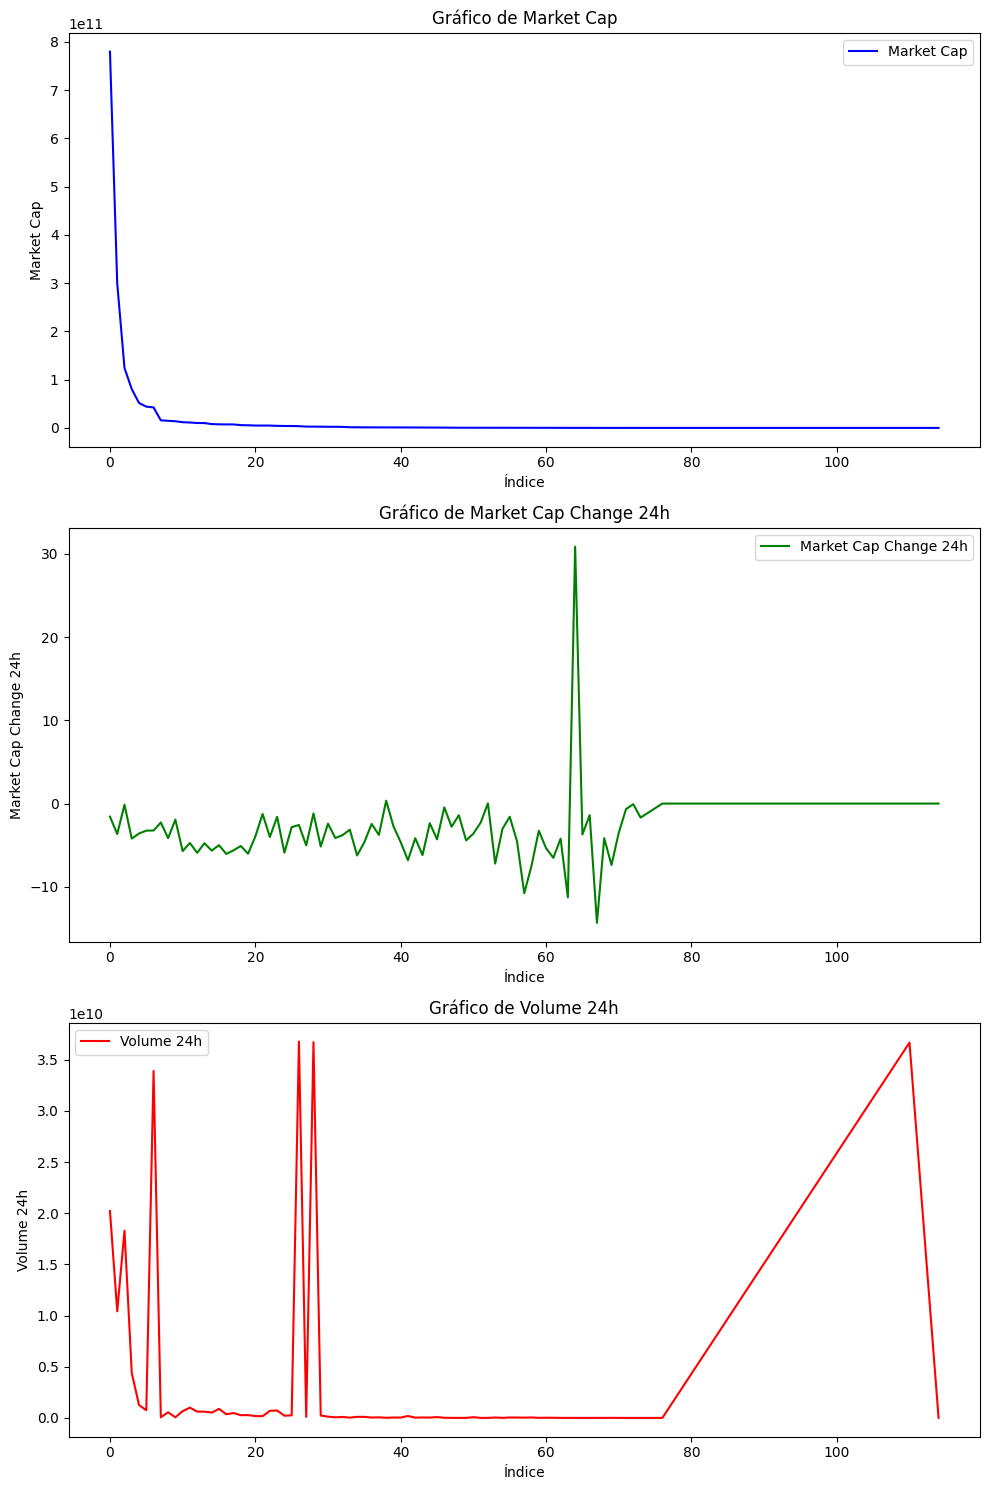

In [18]:
# Crear una figura con tres subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Gráfico 1: Market Cap
axs[0].plot(df_categorias['market_cap'], label='Market Cap', color='blue')
axs[0].set_xlabel('Índice')
axs[0].set_ylabel('Market Cap')
axs[0].set_title('Gráfico de Market Cap')
axs[0].legend()

# Gráfico 2: Market Cap Change 24h
axs[1].plot(df_categorias['market_cap_change_24h'], label='Market Cap Change 24h', color='green')
axs[1].set_xlabel('Índice')
axs[1].set_ylabel('Market Cap Change 24h')
axs[1].set_title('Gráfico de Market Cap Change 24h')
axs[1].legend()

# Gráfico 3: Volume 24h
axs[2].plot(df_categorias['volume_24h'], label='Volume 24h', color='red')
axs[2].set_xlabel('Índice')
axs[2].set_ylabel('Volume 24h')
axs[2].set_title('Gráfico de Volume 24h')
axs[2].legend()

# Ajustar la disposición de los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [19]:
df_categorias_name=df_categorias['name']
df_categorias_name.to_csv('dataset/categoria_name.csv', index=False)

## Categorias de Criptomonedas en CoinGeck
 
1. **Layer 1 (L1)**: Se refiere a las criptomonedas que funcionan en la capa base de una cadena de bloques (blockchain) y no dependen de otra para operar.
2. **Smart Contract Platform**: Son criptomonedas que permiten la ejecución de contratos inteligentes, como Ethereum.
3. **Stablecoins**: Son criptomonedas diseñadas para mantener un valor estable, como Tether (USDT) o USD Coin (USDC).
4. **Alleged SEC Securities**: Criptomonedas que han sido objeto de investigaciones regulatorias de la Comisión de Valores y Bolsa de EE. UU. (SEC).
5. **Exchange-based Tokens**: Tokens emitidos por intercambios de criptomonedas.
6. **Centralized Exchange (CEX)**: Criptomonedas asociadas a intercambios centralizados.
7. **Decentralized Finance (DeFi)**: Criptomonedas utilizadas en aplicaciones y plataformas financieras descentralizadas.
8. **Liquid Staking Tokens**: Tokens que representan activos en staking y permiten la liquidez de los mismos.
9. **Meme**: Criptomonedas relacionadas con memes y entretenimiento, como Dogecoin.
10. **Eth 2.0 Staking**: Criptomonedas relacionadas con el staking en Ethereum 2.0.
11. **Governance**: Tokens utilizados para la gobernanza de protocolos y proyectos.
12. **NFT (Non-Fungible Token)**: Tokens que representan activos únicos y no intercambiables, como obras de arte digitales.
13. **Binance Launchpad**: Criptomonedas lanzadas a través de la plataforma de financiamiento colectivo de Binance.
14. **Decentralized Exchange (DEX)**: Criptomonedas relacionadas con intercambios descentralizados.
15. **Gaming (GameFi)**: Criptomonedas utilizadas en la industria de los videojuegos y GameFi.
16. **Zero Knowledge (ZK)**: Tokens relacionados con la tecnología de conocimiento cero, utilizada en la privacidad.
17. **Yield Farming**: Tokens utilizados en estrategias de yield farming.
18. **Metaverse**: Criptomonedas asociadas a mundos virtuales y experiencias en línea.
19. **Automated Market Maker (AMM)**: Tokens utilizados en protocolos de creación de mercado automatizada.
20. **Play To Earn**: Tokens vinculados a juegos que permiten ganar dinero.
21. **DePIN**: Tokens asociados a aplicaciones de identificación personal.
22. **Privacy Coins**: Criptomonedas diseñadas para garantizar la privacidad y el anonimato.
23. **Wrapped-Tokens**: Tokens envueltos que representan activos de otras cadenas de bloques.
24. **Storage**: Tokens relacionados con soluciones de almacenamiento de datos descentralizado.
25. **Oracle**: Tokens utilizados en oráculos de datos para contratos inteligentes.
26. **Finance / Banking**: Criptomonedas utilizadas en servicios financieros y bancarios.
27. **Liquid Staking Governance Tokens**: Tokens utilizados para gobernanza en redes de staking líquido.
28. **Asset-backed Tokens**: Tokens respaldados por activos del mundo real.
29. **Lending/Borrowing**: Tokens utilizados en plataformas de préstamo y endeudamiento.
30. **Artificial Intelligence (AI)**: Criptomonedas relacionadas con la inteligencia artificial.
31. **Internet of Things (IOT)**: Tokens para aplicaciones de Internet de las cosas.
32. **Derivatives**: Tokens relacionados con instrumentos financieros derivados.
33. **Seigniorage**: Tokens que funcionan en sistemas de seigniorage.
34. **Real World Assets (RWA)**: Tokens respaldados por activos del mundo real.
35. **Sports**: Criptomonedas relacionadas con el mundo del deporte.
36. **SocialFi**: Tokens utilizados en aplicaciones de finanzas sociales.
37. **Perpetuals**: Tokens utilizados en contratos perpetuos.
38. **Tokenized Gold**: Tokens respaldados por oro.
39. **Masternodes**: Tokens utilizados para operaciones de masternode.
40. **Analytics**: Tokens relacionados con servicios de análisis de datos.
41. **Bridge Governance Tokens**: Tokens utilizados para la gobernanza de puentes entre cadenas de bloques.
42. **Synthetic Issuer**: Tokens utilizados en la emisión de activos sintéticos.
43. **Olympus Pro**: Tokens relacionados con Olympus Pro.
44. **Yield Aggregator**: Tokens utilizados en agregadores de rendimiento.
45. **Wallets**: Tokens relacionados con billeteras de criptomonedas.
46. **Gambling**: Tokens utilizados en aplicaciones de juego.
47. **Insurance**: Tokens utilizados en aplicaciones de seguros.
48. **MEV Protection**: Tokens relacionados con la protección contra ataques de extracción de valor en la minería.
49. **Options**: Tokens utilizados en contratos de opciones.
50. **Yearn Ecosystem**: Tokens relacionados con el ecosistema Yearn.
51. **Prediction Markets**: Tokens utilizados en mercados de predicción.
52. **Rebase Tokens**: Tokens que experimentan rebase en su oferta.
53. **NFT Marketplace**: Tokens utilizados en mercados de NFT.
54. **Metagovernance**: Tokens utilizados en sistemas de metagobernanza.
55. **Move To Earn**: Tokens utilizados en programas de recompensas por mudanza.
56. **Telegram Bots**: Tokens relacionados con bots de Telegram.
57. **Fan Token**: Tokens utilizados en aplicaciones de fanáticos.
58. **Guild and Scholarship**: Tokens relacionados con gremios y becas.
59. **BRC-20**: Tokens relacionados con el estándar BRC-20.
60. **Music**: Tokens utilizados en aplicaciones relacionadas con música.
61. **LSDFi**: Tokens relacionados con LSDFi.
62. **Environment**: Tokens utilizados en aplicaciones relacionadas con el medio ambiente.
63. **Synths**: Tokens relacionados con la creación de activos sintéticos.
64. **TRY Stablecoin**: Tokens respaldados por la moneda turca (TRY).
65. **Tourism**: Tokens relacionados con la industria del turismo.
66. **Ohm Fork**: Tokens relacionados con forks de Olympus (Ohm).
67. **Discord Bots**: Tokens relacionados con bots de Discord.
68. **DeFi Index**: Tokens relacionados con índices DeFi.
69. **Kommunitas Launchpad**: Tokens asociados a

## ¿Cuál sería la mejor manera de elegir las 10 criptomonedas que analizar?

Estoy buscando un criterio que me permita elegir las 10 criptomonedas que analizaré.

La función, get_coins_markets te permite obtener una vista panorámica de las criptomonedas más destacadas en función de ciertos criterios y es útil para realizar análisis y comparaciones rápidas entre varias criptomonedas.






In [20]:
# Obtén la lista de las 10 primeras criptomonedas
top_coins = cg.get_coins_markets(vs_currency='usd', order='gecko_desc', per_page=10, page=1)

# Itera a través de las 10 primeras criptomonedas y obtén sus categorías
for coin in top_coins:
    coin_id = coin['id']
    coin_info = cg.get_coin_by_id(coin_id)
    
    if 'categories' in coin_info:
        categories = coin_info['categories']
        print(f"Criptomoneda: {coin_info['name']}")
        print(f"Categorías: {', '.join(categories)}")
        print("------------------------")


Criptomoneda: Bitcoin
Categorías: Cryptocurrency, Layer 1 (L1)
------------------------


Criptomoneda: Ethereum
Categorías: Smart Contract Platform, Layer 1 (L1), Ethereum Ecosystem
------------------------
Criptomoneda: XRP
Categorías: Cryptocurrency
------------------------
Criptomoneda: Solana
Categorías: Alleged SEC Securities, Smart Contract Platform, Solana Ecosystem, Layer 1 (L1)
------------------------
Criptomoneda: BNB
Categorías: Alleged SEC Securities, Smart Contract Platform, Exchange-based Tokens, BNB Chain Ecosystem, Centralized Exchange (CEX), Avalanche Ecosystem, Moonriver Ecosystem, Layer 1 (L1), Polygon Ecosystem, Ethereum Ecosystem
------------------------
Criptomoneda: Dogecoin
Categorías: Cryptocurrency, BNB Chain Ecosystem, Meme
------------------------
Criptomoneda: Cardano
Categorías: Alleged SEC Securities, Smart Contract Platform, Cardano Ecosystem, Layer 1 (L1)
------------------------
Criptomoneda: Chainlink
Categorías: Business Services, Infrastructure, Smart Contract Platform, Decentralized Finance (DeFi), Oracle, BNB Chain Ecosystem, Polkado

Obtuve  10 criptomonedas ordenadas por el parametro gecko_desc, observo que cada moneda puede tener una o varias categorias.

Las categorías son etiquetas utilizadas para agrupar diferentes criptomonedas según su relación o asociación con ciertas plataformas o ecosistemas

Examinando el resultado, es muy amplio para aplicar un criterio, es muy subjetivo 

Estudiando el parametro **order** en la función get_coins_markets de la API de CoinGecko permite ordenar las criptomonedas según diferentes criterios. 

Algunos de los valores que podemos utilizar son:

- **'market_cap_desc':** Ordenar por capitalización de mercado descendente.
- **'market_cap_asc':** Ordenar por capitalización de mercado ascendente.
- **'volume_desc':** Ordenar por volumen de negociación descendente.
- **'volume_asc':** Ordenar por volumen de negociación ascendente.
- **'gecko_desc':** Ordenar por la puntuación de CoinGecko descendente (una medida de la calidad y la actividad del proyecto).
- **'gecko_asc':** Ordenar por la puntuación de CoinGecko ascendente.
- **'name_asc':** Ordenar alfabéticamente por nombre de criptomoneda ascendente.
- **'name_desc':** Ordenar alfabéticamente por nombre de criptomoneda descendente.
- **'price_asc':** Ordenar por precio ascendente.
- **'price_desc':** Ordenar por precio descendente.
- **'h24_change_desc':** Ordenar por cambio en las últimas 24 horas descendente.
- **'h24_change_asc':** Ordenar por cambio en las últimas 24 horas ascendente.

Me llama la atención los parametros **'market_cap_desc'** y **'gecko_desc'**

In [21]:
# Obtén la lista de las 10 primeras criptomonedas ordenadas por capitalización de mercado descendente
top_coins = cg.get_coins_markets(vs_currency='usd', order='market_cap_desc', per_page=10, page=1)

# Itera a través de las 10 primeras criptomonedas y muestra los datos más importantes
for coin in top_coins:
    coin_name = coin['name']
    coin_symbol = coin['symbol']
    coin_market_cap = coin['market_cap']
    coin_price = coin['current_price']
    coin_volume = coin['total_volume']
    coin_change_24h = coin['price_change_percentage_24h']
    
    print(f"Nombre: {coin_name} ({coin_symbol})")
    print(f"Capitalización de Mercado: ${coin_market_cap:,}")  # Agrega comas para mejorar la legibilidad
    print(f"Precio Actual: ${coin_price:,.2f}")
    print(f"Volumen Total: ${coin_volume:,}")
    print(f"Cambio en las últimas 24 horas: {coin_change_24h:.2f}%")
    print("------------------------")



Nombre: Bitcoin (btc)
Capitalización de Mercado: $502,981,750,158
Precio Actual: $25,845.00
Volumen Total: $11,597,092,796
Cambio en las últimas 24 horas: -1.08%
------------------------
Nombre: Ethereum (eth)
Capitalización de Mercado: $196,080,774,236
Precio Actual: $1,631.26
Volumen Total: $7,305,573,461
Cambio en las últimas 24 horas: -2.59%
------------------------
Nombre: Tether (usdt)
Capitalización de Mercado: $82,822,219,313
Precio Actual: $1.00
Volumen Total: $11,795,147,505
Cambio en las últimas 24 horas: -0.04%
------------------------
Nombre: BNB (bnb)
Capitalización de Mercado: $32,160,517,463
Precio Actual: $209.08
Volumen Total: $661,594,960
Cambio en las últimas 24 horas: -0.94%
------------------------
Nombre: XRP (xrp)
Capitalización de Mercado: $27,332,312,056
Precio Actual: $0.52
Volumen Total: $1,027,018,729
Cambio en las últimas 24 horas: -1.07%
------------------------
Nombre: USD Coin (usdc)
Capitalización de Mercado: $25,916,721,814
Precio Actual: $1.00
Volume

### Obtenemos un listado de criptomonedas ordenadas por capitalización de mercado descendente usando el parámetro order 'market_cap_desc' de la función get_coins_markets de la API de CoinGecko

¿Por qué? Es fácil de entender y proporciona una lista simple de criptomonedas muy populares. La capitalización de mercado es una medida de cuánto valor total tiene una criptomoneda en circulación. Ordenar por capitalización de mercado descendente mostrará las criptomonedas más grandes primero, lo que generalmente incluye aquellas que son ampliamente conocidas y utilizadas.

Este enfoque es amigable porque:

1. **Familiaridad**: todos suelen haber oído hablar de las criptomonedas más grandes como Bitcoin y Ethereum, por lo que verán estas monedas en la parte superior de la lista.

2. **Simplicidad**: No requiere entender conceptos técnicos complejos. La capitalización de mercado es una medida "relativamente" fácil de entender.

3. **Visibilidad**: Las criptomonedas con una alta capitalización de mercado suelen ser más estables y tienen una comunidad más grande detrás de ellas, lo que puede ser tranquilizador para quienes quieren empezar a conocer este mundo.

In [22]:
# Crea una lista para almacenar los IDs de las 10 criptomonedas
top_coin_ids = []

# Itera a través de las 10 primeras criptomonedas y almacena sus IDs en la lista
for coin in top_coins:
    coin_id = coin['id']
    top_coin_ids.append(coin_id)

# Imprime la lista de IDs
print(top_coin_ids)

['bitcoin', 'ethereum', 'tether', 'binancecoin', 'ripple', 'usd-coin', 'staked-ether', 'cardano', 'dogecoin', 'solana']


Sin embargo la siguiente categoria me llama la atención

15. **Gaming (GameFi)**: Criptomonedas utilizadas en la industria de los videojuegos y GameFi.

Como memcione lineas arriba me parece muy subjetivo y la industria de los videojuegos siempre es muy activa y sencilla de entender 

In [25]:
# Define the API endpoint
endpoint = "https://api.coingecko.com/api/v3/coins/markets?vs_currency=usd&category=gaming&order=market_cap_desc&per_page=10&page=1&sparkline=false&locale=en"

# Make the request
top_coins_gaiming = requests.get(endpoint)

# Check the response status code
if top_coins_gaiming.status_code == 200:

    # Decode the JSON response
    top_coins_gaiming_data = top_coins_gaiming.json()

    # Print the top 10 cryptocurrencies
    for coin in top_coins_gaiming_data:
        #print(coin["name"], coin["market_cap"])
        coin_name = coin['name']
        coin_symbol = coin['symbol']
        coin_market_cap = coin['market_cap']
        coin_price = coin['current_price']
        coin_volume = coin['total_volume']
        coin_change_24h = coin['price_change_percentage_24h']
        
        print(f"Nombre: {coin_name} ({coin_symbol})")
        print(f"Capitalización de Mercado: ${coin_market_cap:,}")  # Agrega comas para mejorar la legibilidad
        print(f"Precio Actual: ${coin_price:,.2f}")
        print(f"Volumen Total: ${coin_volume:,}")
        print(f"Cambio en las últimas 24 horas: {coin_change_24h:.2f}%")
        print("------------------------")        

else:
    print("Error:", response.status_code)


Nombre: Internet Computer (icp)
Capitalización de Mercado: $1,474,209,790
Precio Actual: $3.34
Volumen Total: $20,685,645
Cambio en las últimas 24 horas: -4.29%
------------------------
Nombre: The Sandbox (sand)
Capitalización de Mercado: $656,890,288
Precio Actual: $0.32
Volumen Total: $40,077,526
Cambio en las últimas 24 horas: -2.33%
------------------------
Nombre: ImmutableX (imx)
Capitalización de Mercado: $646,876,636
Precio Actual: $0.58
Volumen Total: $15,646,273
Cambio en las últimas 24 horas: -4.79%
------------------------
Nombre: Axie Infinity (axs)
Capitalización de Mercado: $631,490,916
Precio Actual: $4.82
Volumen Total: $15,357,825
Cambio en las últimas 24 horas: -1.97%
------------------------
Nombre: ApeCoin (ape)
Capitalización de Mercado: $549,141,754
Precio Actual: $1.49
Volumen Total: $61,348,260
Cambio en las últimas 24 horas: -3.16%
------------------------
Nombre: GALA (gala)
Capitalización de Mercado: $483,084,940
Precio Actual: $0.02
Volumen Total: $450,699

In [26]:
# Crea una lista para almacenar los IDs de las 10 criptomonedas
top_coin_gaming_ids = []

# Itera a través de las 10 primeras criptomonedas y almacena sus IDs en la lista
for coin in top_coins_gaiming_data:
    coin_id = coin['id']
    top_coin_gaming_ids.append(coin_id)

# Imprime la lista de IDs
print(top_coin_gaming_ids)

['internet-computer', 'the-sandbox', 'immutable-x', 'axie-infinity', 'apecoin', 'gala', 'illuvium', 'enjincoin', 'stepn', 'floki']


## 10 criptomonedas seleccionadas por mercado de capitales y 10 criptomonedas por categoria Gaming  

In [27]:
print(top_coin_ids)
print(top_coin_gaming_ids)


['bitcoin', 'ethereum', 'tether', 'binancecoin', 'ripple', 'usd-coin', 'staked-ether', 'cardano', 'dogecoin', 'solana']
['internet-computer', 'the-sandbox', 'immutable-x', 'axie-infinity', 'apecoin', 'gala', 'illuvium', 'enjincoin', 'stepn', 'floki']


## Obtener valores historicos 

Se obtienen valores de los ultimos 5 años
valos antes, durante y después de pandemia 

In [28]:
# Obtén la fecha actual y la fecha hace 5 años
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=5*365)

# Crear un DataFrame para almacenar los datos
data_list = []

# Itera a través de los IDs de las criptomonedas y obtén datos históricos
for coin_id in top_coin_ids:
    historical_data = cg.get_coin_market_chart_range_by_id(id=coin_id, vs_currency='usd', from_timestamp=start_date.timestamp(), to_timestamp=end_date.timestamp())
    
    for data_point in historical_data['prices']:
        timestamp = data_point[0]
        date = datetime.datetime.fromtimestamp(timestamp / 1000.0)
        price = data_point[1]
        
        data_list.append({'Criptomoneda': coin_id, 'Fecha': date, 'Precio': price})

for coin_id in top_coin_gaming_ids:
    historical_data = cg.get_coin_market_chart_range_by_id(id=coin_id, vs_currency='usd', from_timestamp=start_date.timestamp(), to_timestamp=end_date.timestamp())
    
    for data_point in historical_data['prices']:
        timestamp = data_point[0]
        date = datetime.datetime.fromtimestamp(timestamp / 1000.0)
        price = data_point[1]
        
        data_list.append({'Criptomoneda': coin_id, 'Fecha': date, 'Precio': price})

# Crear un DataFrame a partir de la lista de datos
df = pd.DataFrame(data_list)

# Guardar el DataFrame en un archivo CSV
df.to_csv('dataset/datos_historicos.csv', index=False)

print("Datos guardados en 'datos_historicos.csv'")


Datos guardados en 'datos_historicos.csv'


In [32]:
historical_data

{'prices': [[1624838400000, 1.3954418147213393e-06],
  [1624924800000, 1.3954418147213393e-06],
  [1625011200000, 2.8485461975461322e-06],
  [1625097600000, 9.495873800973333e-06],
  [1625184000000, 3.6916515308585864e-06],
  [1625270400000, 2.5175805732283795e-06],
  [1625356800000, 2.3262256448345707e-06],
  [1625443200000, 1.4664535653368623e-06],
  [1625529600000, 6.790397932589209e-07],
  [1625616000000, 1.0627468827130751e-07],
  [1625702400000, 1.1656126475190291e-07],
  [1625788800000, 1.102733689982545e-07],
  [1625875200000, 3.926104245299367e-06],
  [1625961600000, 3.978565881444511e-06],
  [1626048000000, 4.004384687947957e-06],
  [1626134400000, 3.216339575328233e-06],
  [1626220800000, 2.25541041597143e-06],
  [1626307200000, 2.3573226639906233e-06],
  [1626393600000, 1.6579389660516706e-06],
  [1626480000000, 1.8092208292722786e-06],
  [1626566400000, 1.603550391899105e-06],
  [1626652800000, 1.6796261378784863e-06],
  [1626739200000, 1.5584876273157255e-06],
  [16268256

In [33]:
df

Criptomoneda               Fecha       Precio
0          bitcoin 2018-08-23 19:00:00  6521.065718
1          bitcoin 2018-08-24 19:00:00  6684.379144
2          bitcoin 2018-08-25 19:00:00  6736.036058
3          bitcoin 2018-08-26 19:00:00  6728.288003
4          bitcoin 2018-08-27 19:00:00  6911.096029
...            ...                 ...          ...
25985        floki 2023-08-17 19:00:00     0.000018
25986        floki 2023-08-18 19:00:00     0.000018
25987        floki 2023-08-19 19:00:00     0.000019
25988        floki 2023-08-20 19:00:00     0.000019
25989        floki 2023-08-21 19:00:00     0.000018

[25990 rows x 3 columns]

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25990 entries, 0 to 25989
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Criptomoneda  25990 non-null  object        
 1   Fecha         25990 non-null  datetime64[ns]
 2   Precio        25990 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 609.3+ KB


In [35]:
df.describe()

Fecha        Precio
count                          25990  2.599000e+04
mean   2021-08-06 15:19:52.335513600  1.788216e+03
min              2018-08-23 19:00:00  1.062747e-07
25%              2020-08-05 19:00:00  3.107615e-01
50%              2021-10-27 19:00:00  1.002249e+00
75%              2022-10-01 19:00:00  6.936714e+01
max              2023-08-21 19:00:00  6.761702e+04
std                              NaN  7.230548e+03

In [36]:
print(list(historical_data.keys()))


['prices', 'market_caps', 'total_volumes']


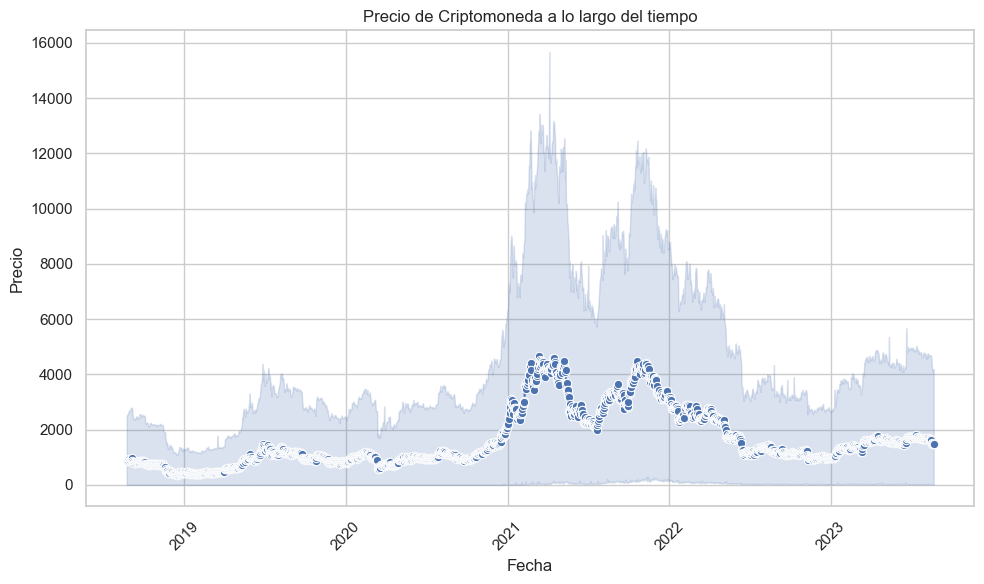

In [37]:
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico usando Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Fecha', y='Precio', data=df, marker='o')
plt.title('Precio de Criptomoneda a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


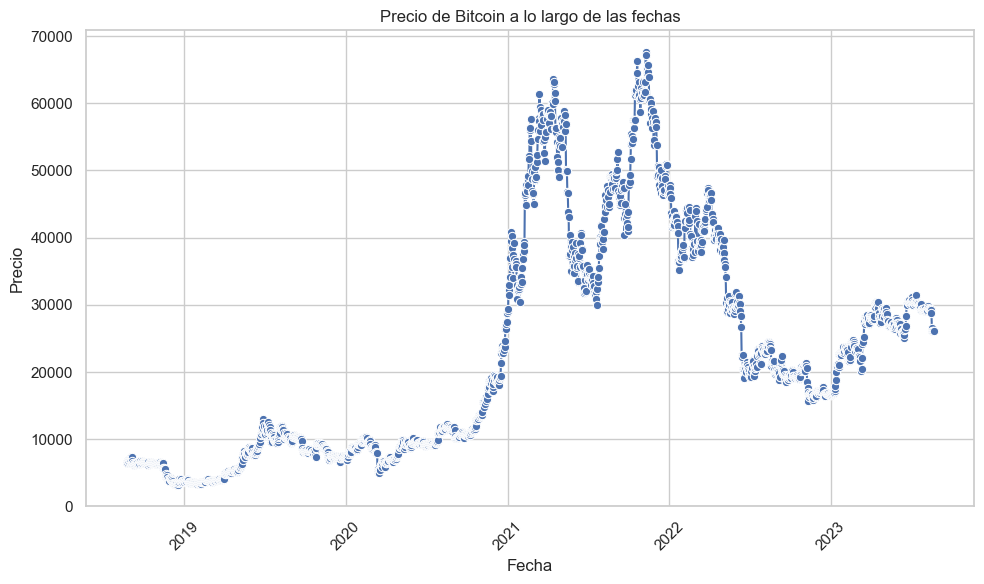

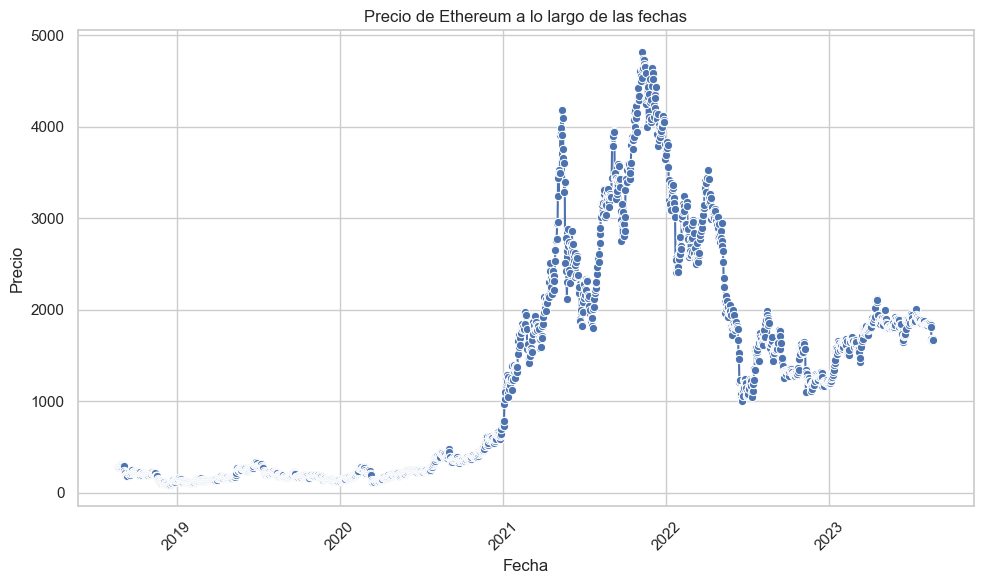

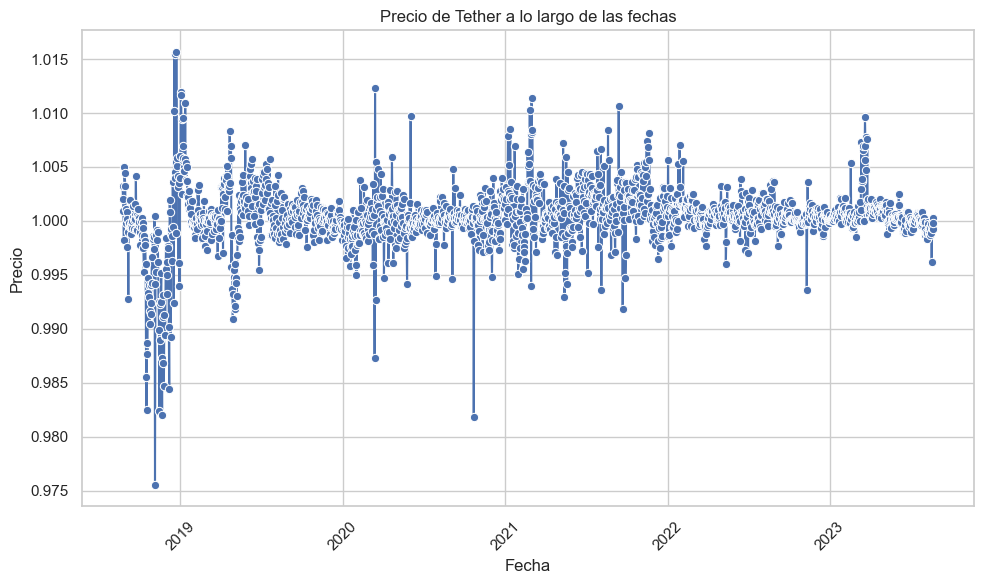

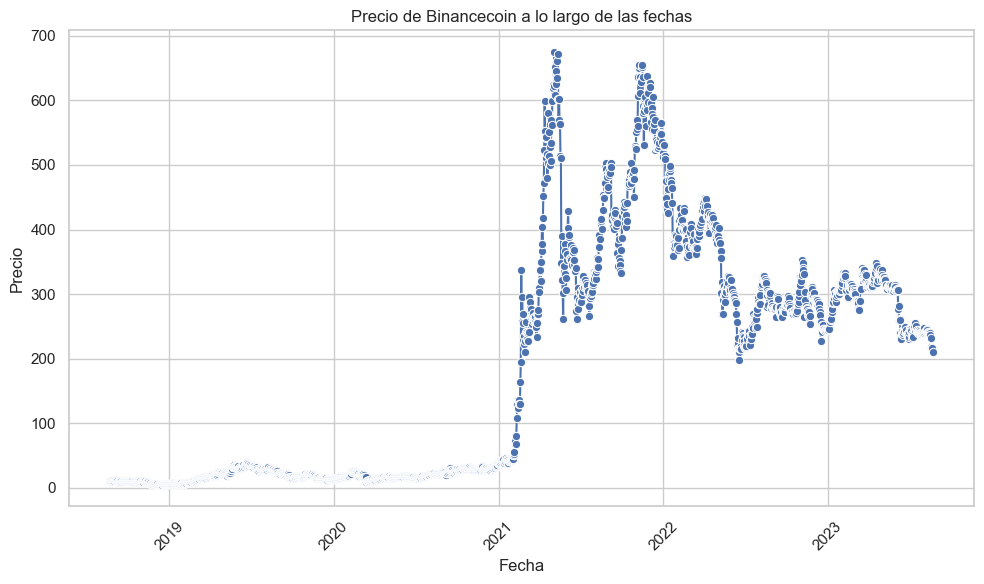

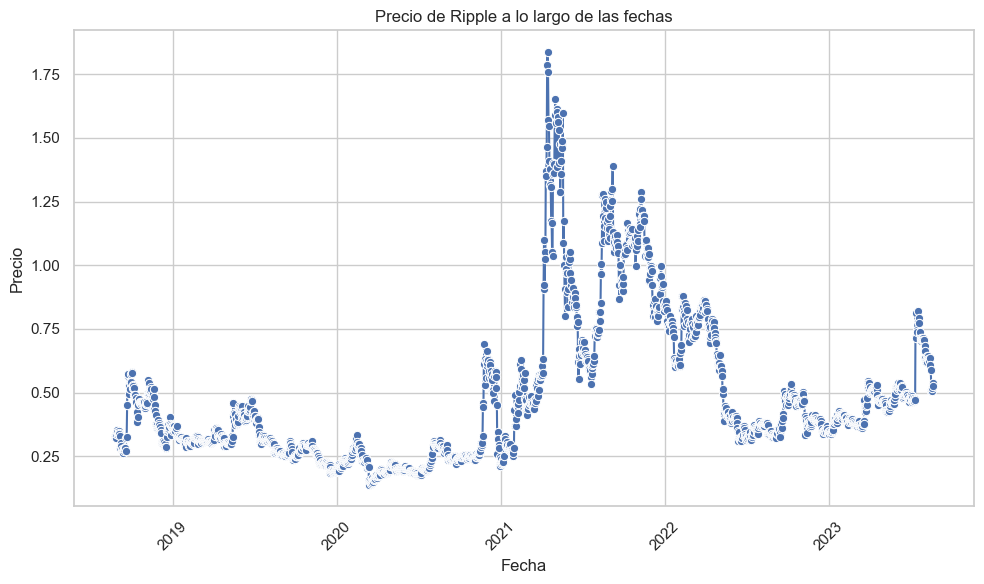

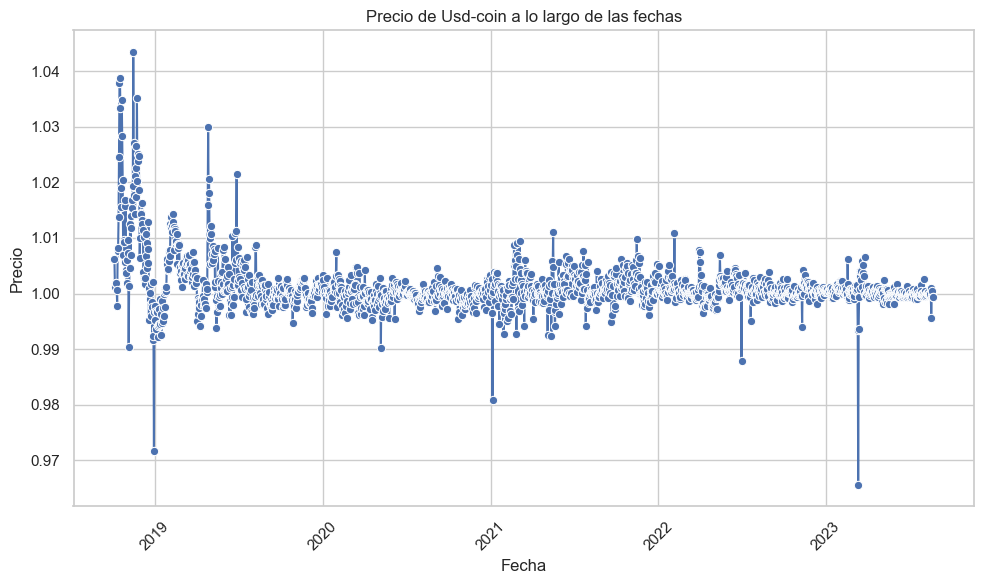

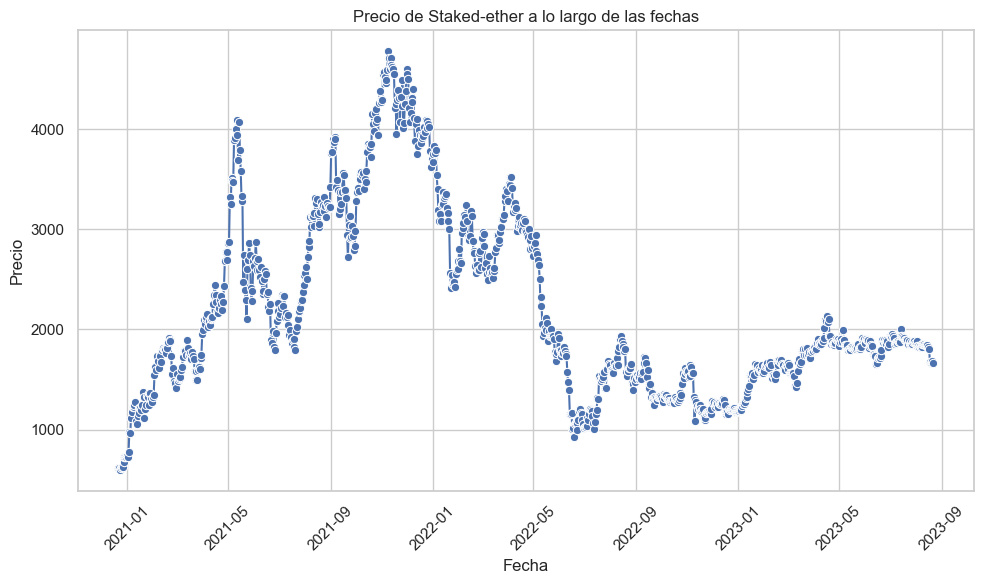

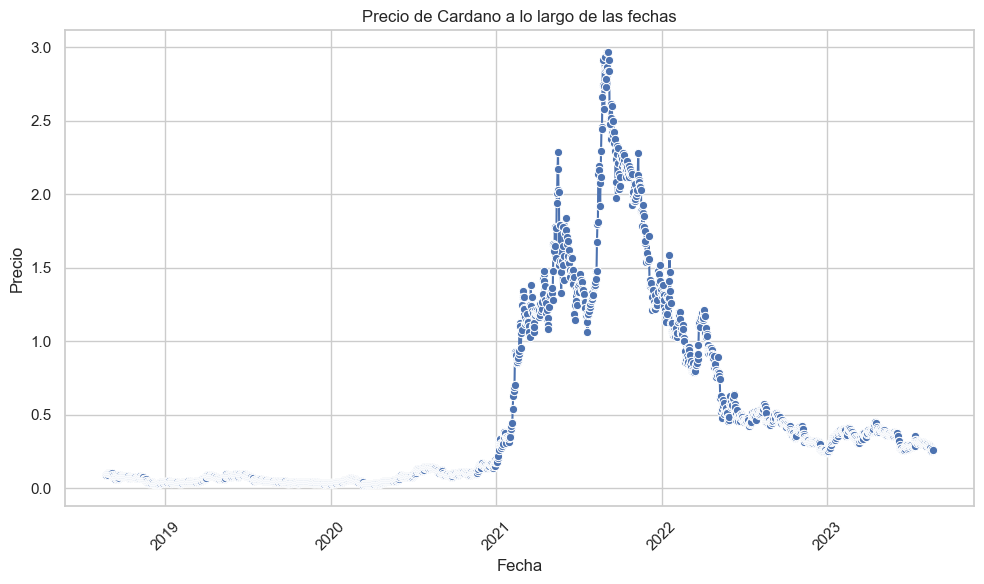

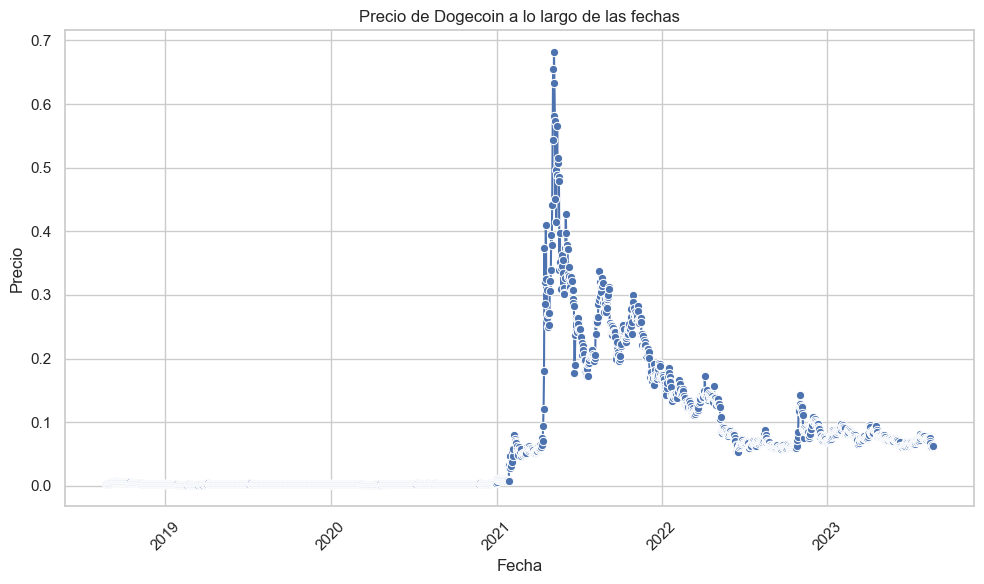

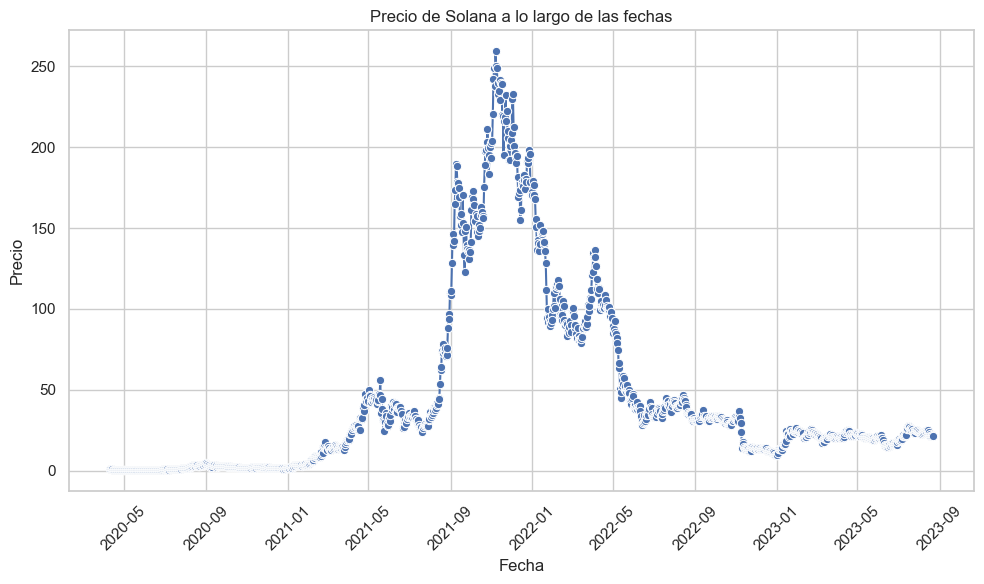

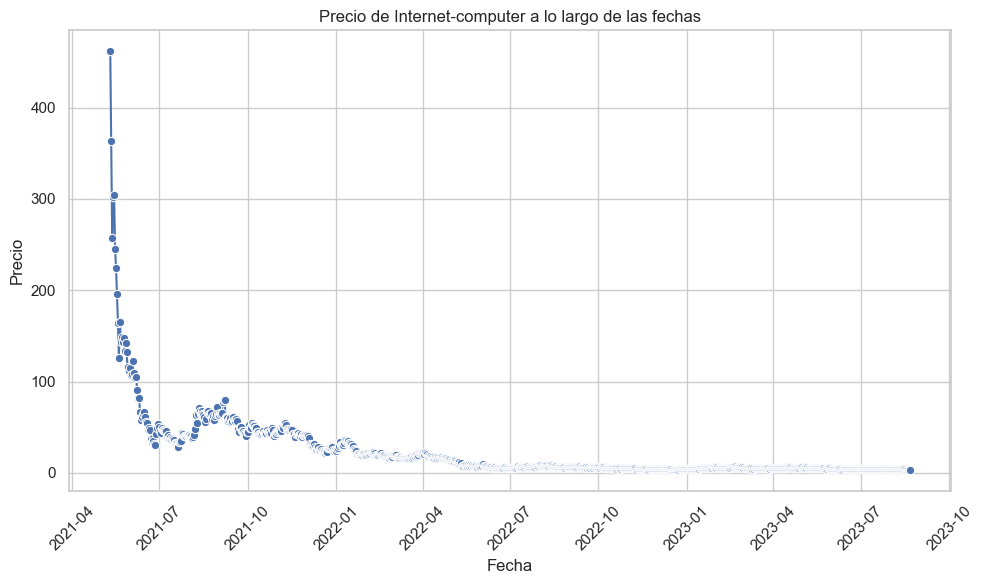

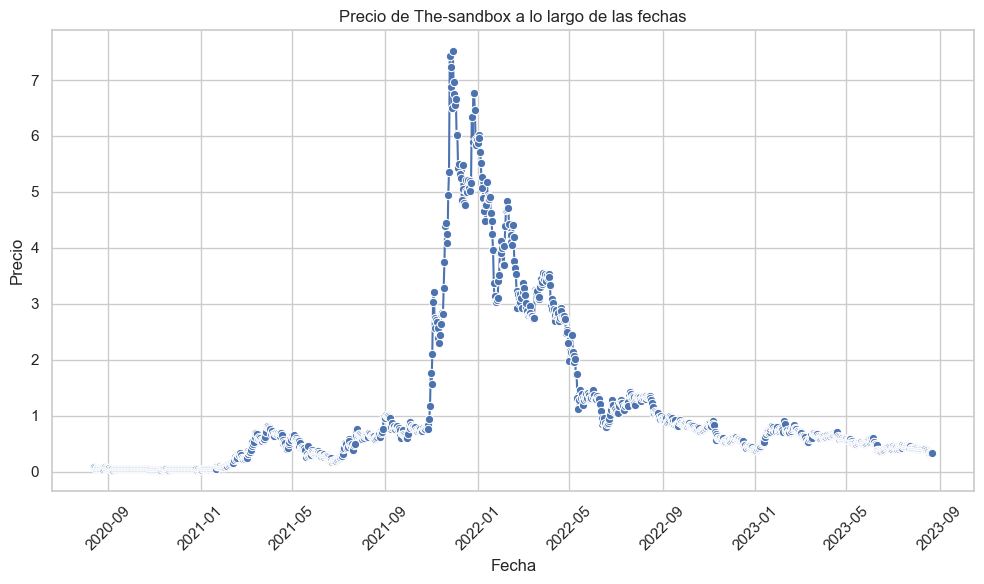

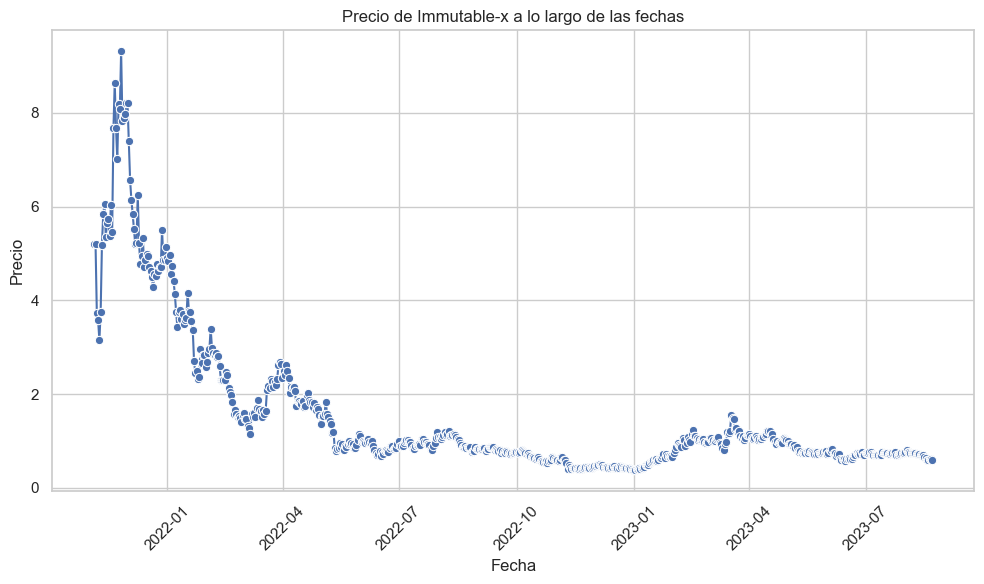

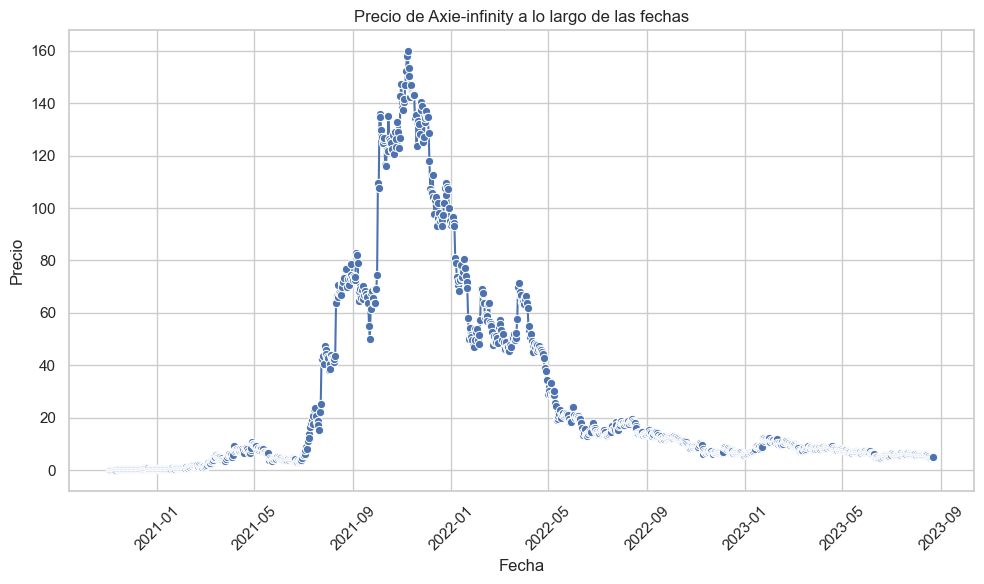

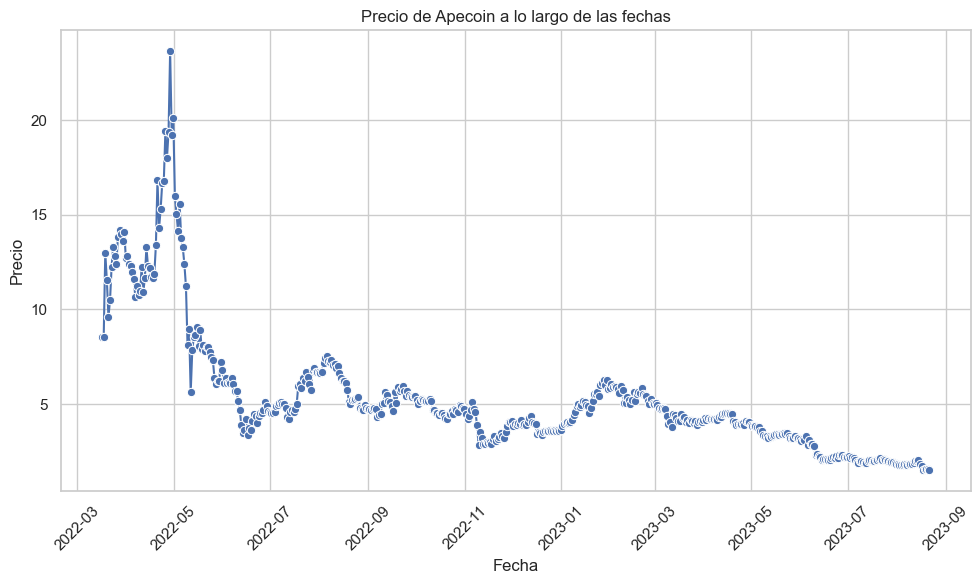

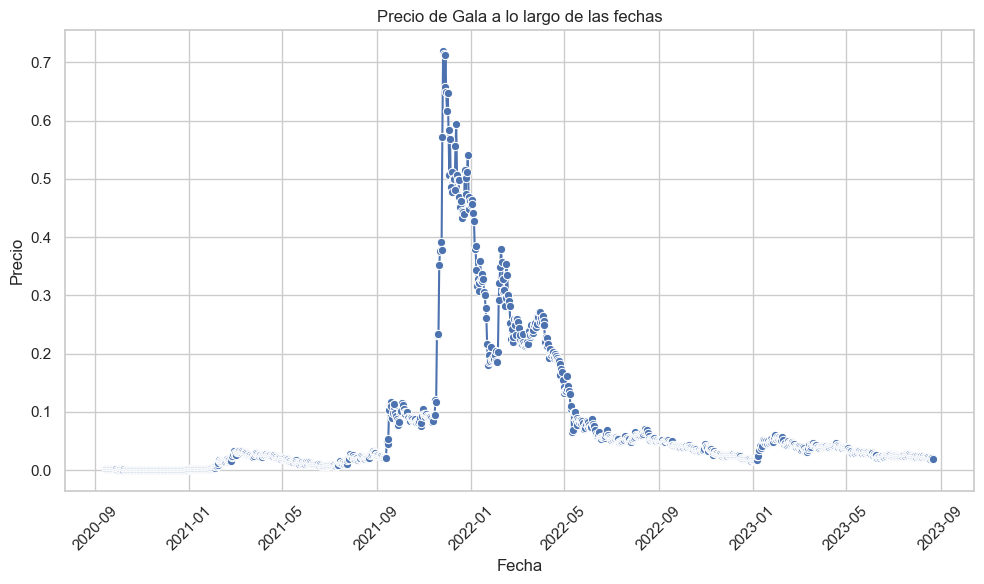

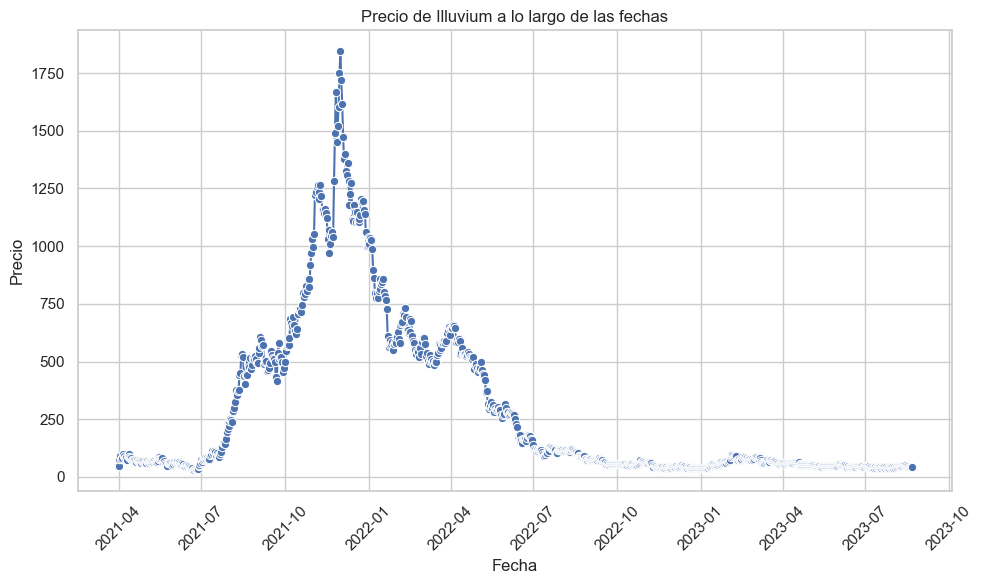

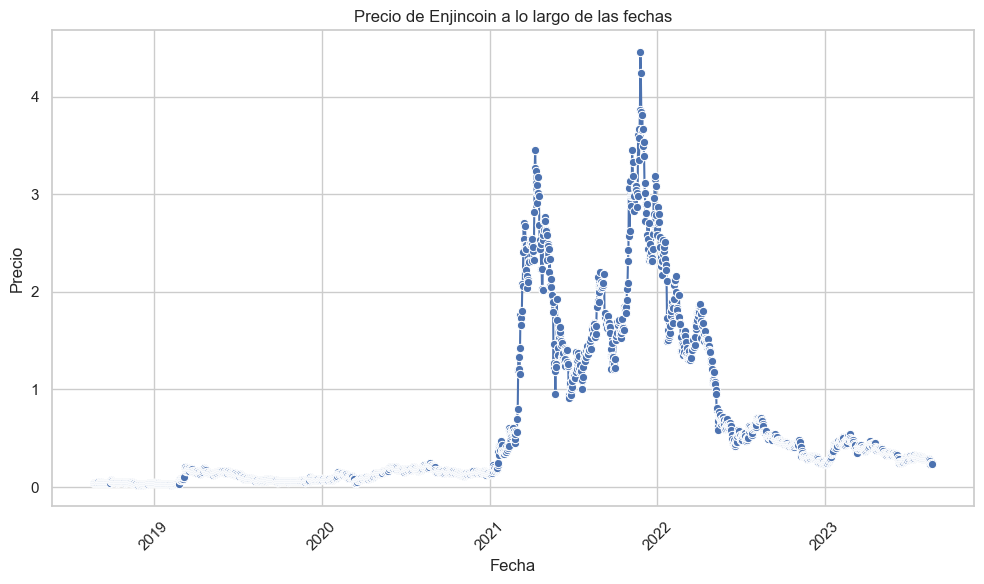

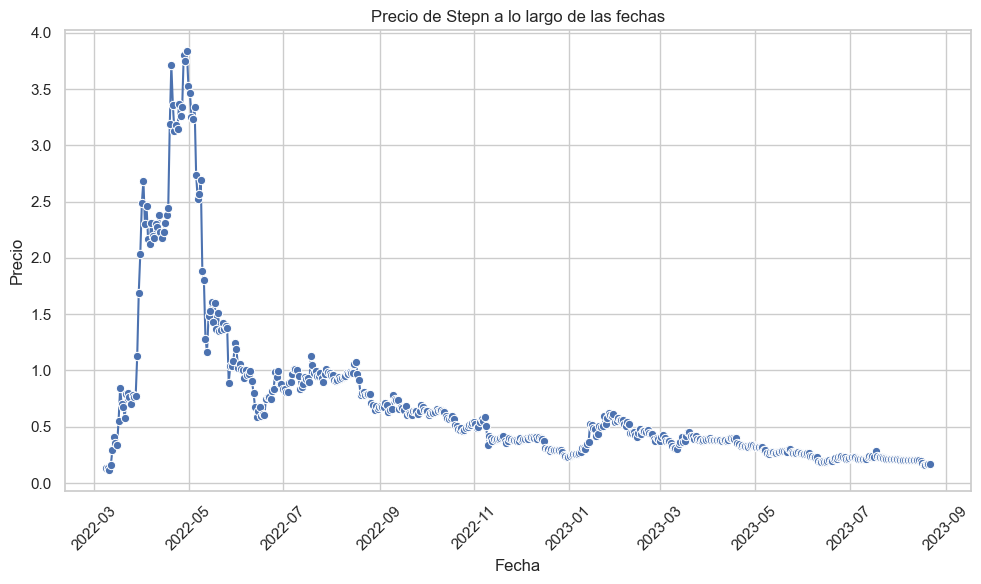

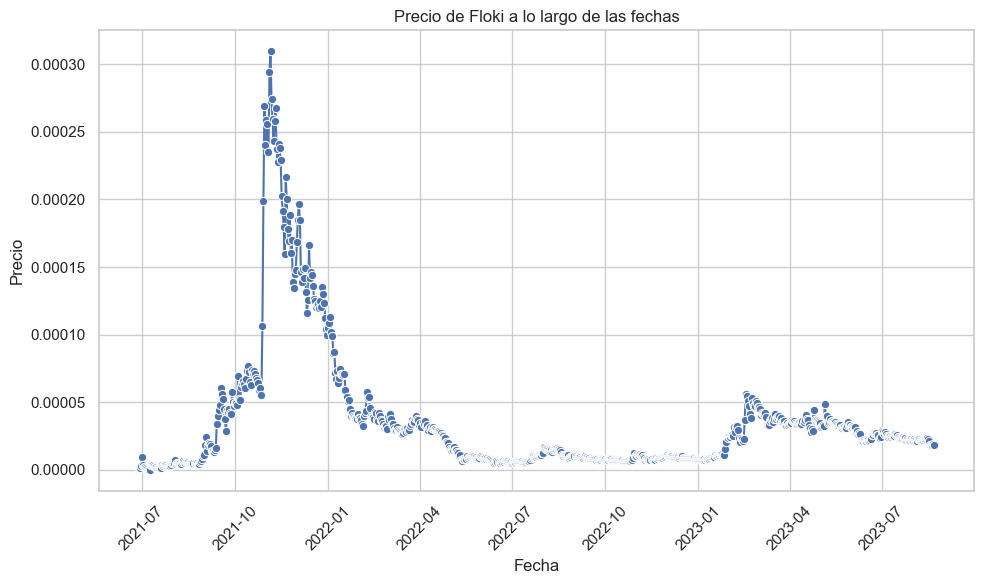

In [38]:
sns.set(style="whitegrid")

# Crear un gráfico por cada criptomoneda
criptomonedas = df['Criptomoneda'].unique()
for cripto in criptomonedas:
    plt.figure(figsize=(10, 6))
    df_cripto = df[df['Criptomoneda'] == cripto]
    sns.lineplot(x='Fecha', y='Precio', data=df_cripto, marker='o')
    plt.title(f'Precio de {cripto.capitalize()} a lo largo de las fechas')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [40]:
# Obtén los tipos de cambio en USD para cada criptomoneda
data = {}

for crypto in top_coin_ids:
    crypto_data = cg.get_price(ids=crypto, vs_currencies='usd')
    data[crypto] = crypto_data[crypto]['usd']

for crypto in top_coin_gaming_ids:
    crypto_data = cg.get_price(ids=crypto, vs_currencies='usd')
    data[crypto] = crypto_data[crypto]['usd']

# Crear un DataFrame a partir de los datos
df_ex = pd.DataFrame(data.items(), columns=['Criptomoneda', 'Tipo de Cambio USD'])

# Mostrar el DataFrame con los tipos de cambio
df_ex.to_csv('dataset/crypto_tc.csv', index=False)

In [39]:
df_ex

Criptomoneda  Tipo de Cambio USD
0             bitcoin        25827.000000
1            ethereum         1630.540000
2              tether            0.999914
3         binancecoin          208.750000
4              ripple            0.517086
5            usd-coin            1.000000
6        staked-ether         1629.630000
7             cardano            0.255490
8            dogecoin            0.062036
9              solana           20.210000
10  internet-computer            3.340000
11        the-sandbox            0.318892
12        immutable-x            0.575294
13      axie-infinity            4.820000
14            apecoin            1.490000
15               gala            0.018972
16           illuvium           42.630000
17          enjincoin            0.235294
18              stepn            0.163263
19              floki            0.000018

In [ ]:
# ID de la criptomoneda que deseas obtener (en este caso, Bitcoin)
crypto_id = 'bitcoin'

# Obtener todos los datos disponibles para la criptomoneda
crypto_data = cg.get_coin_by_id(id=crypto_id)

# Mostrar todos los campos disponibles
for key, value in crypto_data.items():
    print(f"{key}: {value}")


id: bitcoin
symbol: btc
name: Bitcoin
asset_platform_id: None
platforms: {'': ''}
detail_platforms: {'': {'decimal_place': None, 'contract_address': ''}}
block_time_in_minutes: 10
hashing_algorithm: SHA-256
categories: ['Cryptocurrency', 'Layer 1 (L1)']
public_notice: None
additional_notices: []
localization: {'en': 'Bitcoin', 'de': 'Bitcoin', 'es': 'Bitcoin', 'fr': 'Bitcoin', 'it': 'Bitcoin', 'pl': 'Bitcoin', 'ro': 'Bitcoin', 'hu': 'Bitcoin', 'nl': 'Bitcoin', 'pt': 'Bitcoin', 'sv': 'Bitcoin', 'vi': 'Bitcoin', 'tr': 'Bitcoin', 'ru': 'Биткоин', 'ja': 'ビットコイン', 'zh': '比特币', 'zh-tw': '比特幣', 'ko': '비트코인', 'ar': 'بيتكوين', 'th': 'บิตคอยน์', 'id': 'Bitcoin', 'cs': 'Bitcoin', 'da': 'Bitcoin', 'el': 'Bitcoin', 'hi': 'Bitcoin', 'no': 'Bitcoin', 'sk': 'Bitcoin', 'uk': 'Bitcoin', 'he': 'Bitcoin', 'fi': 'Bitcoin', 'bg': 'Bitcoin', 'hr': 'Bitcoin', 'lt': 'Bitcoin', 'sl': 'Bitcoin'}
description: {'en': 'Bitcoin is the first successful internet money based on peer-to-peer technology; whereby no centr

In [42]:
crypto_data = {}

# Obtener todos los datos para cada criptomoneda y agregarlos al diccionario
for crypto in top_coin_ids:
    data = cg.get_coin_by_id(id=crypto)
    for key, value in data.items():
        if key in crypto_data:
            crypto_data[key].append(value)
        else:
            crypto_data[key] = [value]  # Crea una nueva lista si es la primera vez que se encuentra este campo
for crypto in top_coin_gaming_ids:
    data = cg.get_coin_by_id(id=crypto)
    for key, value in data.items():
        if key in crypto_data:
            crypto_data[key].append(value)
        else:
            crypto_data[key] = [value]  # Crea una nueva lista si es la primera vez que se encuentra este campo

# Asegurarse de que todas las listas tengan la misma longitud llenando con None donde falten datos
max_len = max(len(value) for value in crypto_data.values())
for key, value in crypto_data.items():
    if len(value) < max_len:
        crypto_data[key] += [None] * (max_len - len(value))


# Crear un DataFrame a partir del diccionario
df_crypto = pd.DataFrame(crypto_data)

# Guardar el DataFrame en un archivo CSV
df_crypto.to_csv('dataset/crypto_data.csv', index=False)

In [43]:
df_crypto

id symbol               name asset_platform_id   
0             bitcoin    btc            Bitcoin              None  \
1            ethereum    eth           Ethereum              None   
2              tether   usdt             Tether          ethereum   
3         binancecoin    bnb                BNB              None   
4              ripple    xrp                XRP              None   
5            usd-coin   usdc           USD Coin          ethereum   
6        staked-ether  steth  Lido Staked Ether          ethereum   
7             cardano    ada            Cardano              None   
8            dogecoin   doge           Dogecoin              None   
9              solana    sol             Solana              None   
10  internet-computer    icp  Internet Computer              None   
11        the-sandbox   sand        The Sandbox          ethereum   
12        immutable-x    imx         ImmutableX          ethereum   
13      axie-infinity    axs      Axie Infinity          ethereum   
14            apecoin    ape            ApeCoin          ethereum   
15               gala   gala               GALA          ethereum   
16           illuvium    ilv           Illuvium          ethereum   
17          enjincoin    enj         Enjin Coin          ethereum   
18              stepn    gmt              STEPN            solana   
19              floki  floki              FLOKI          ethereum   

                                            platforms   
0                                            {'': ''}  \
1                                            {'': ''}   
2   {'ethereum': '0xdac17f958d2ee523a2206206994597...   
3   {'': '', 'ethereum': '0xb8c77482e45f1f44de1745...   
4                                            {'': ''}   
5   {'ethereum': '0xa0b86991c6218b36c1d19d4a2e9eb0...   
6   {'ethereum': '0xae7ab96520de3a18e5e111b5eaab09...   
7                                            {'': ''}   
8                                            {'': ''}   
9                                            {'': ''}   
10                                           {'': ''}   
11  {'ethereum': '0x3845badade8e6dff049820680d1f14...   
12  {'ethereum': '0xf57e7e7c23978c3caec3c3548e3d61...   
13  {'ethereum': '0xbb0e17ef65f82ab018d8edd776e8dd...   
14  {'ethereum': '0x4d224452801aced8b2f0aebe155379...   
15  {'ethereum': '0xd1d2eb1b1e90b638588728b4130137...   
16  {'ethereum': '0x767fe9edc9e0df98e07454847909b5...   
17  {'ethereum': '0xf629cbd94d3791c9250152bd8dfbdf...   
18  {'solana': '7i5KKsX2weiTkry7jA4ZwSuXGhs5eJBEjY...   
19  {'ethereum': '0xcf0c122c6b73ff809c693db761e7ba...   

                                     detail_platforms  block_time_in_minutes   
0   {'': {'decimal_place': None, 'contract_address...                     10  \
1   {'': {'decimal_place': None, 'contract_address...                      0   
2   {'ethereum': {'decimal_place': 6, 'contract_ad...                      0   
3   {'': {'decimal_place': None, 'contract_address...                      0   
4   {'': {'decimal_place': None, 'contract_address...                      0   
5   {'ethereum': {'decimal_place': 6, 'contract_ad...                      0   
6   {'ethereum': {'decimal_place': 18, 'contract_a...                      0   
7   {'': {'decimal_place': None, 'contract_address...                      0   
8   {'': {'decimal_place': None, 'contract_address...                      1   
9   {'': {'decimal_place': None, 'contract_address...                      0   
10  {'': {'decimal_place': None, 'contract_address...                      0   
11  {'ethereum': {'decimal_place': 18, 'contract_a...                      0   
12  {'ethereum': {'decimal_place': 18, 'contract_a...                      0   
13  {'ethereum': {'decimal_place': 18, 'contract_a...                      0   
14  {'ethereum': {'decimal_place': 18, 'contract_a...                      0   
15  {'ethereum': {'decimal_place': 8, 'contract_ad...                      0   
16  {'ether

In [44]:
df_crypto.columns

Index(['id', 'symbol', 'name', 'asset_platform_id', 'platforms',
       'detail_platforms', 'block_time_in_minutes', 'hashing_algorithm',
       'categories', 'public_notice', 'additional_notices', 'localization',
       'description', 'links', 'image', 'country_origin', 'genesis_date',
       'sentiment_votes_up_percentage', 'sentiment_votes_down_percentage',
       'watchlist_portfolio_users', 'market_cap_rank', 'coingecko_rank',
       'coingecko_score', 'developer_score', 'community_score',
       'liquidity_score', 'public_interest_score', 'market_data',
       'community_data', 'developer_data', 'public_interest_stats',
       'status_updates', 'last_updated', 'tickers', 'ico_data',
       'contract_address'],
      dtype='object')

### Diccionario de datos

01. **'id'**: El identificador único de la criptomoneda.
02. **'symbol'**: El símbolo o ticker de la criptomoneda (por ejemplo, "BTC" para Bitcoin).
03. **'name'**: El nombre completo de la criptomoneda.
04. **'asset_platform_id'**: El identificador de la plataforma de activos si la criptomoneda se ejecuta en una plataforma específica.
05. **'platforms'**: Plataformas específicas en las que opera la criptomoneda.
06. **'detail_platforms'**: Detalles adicionales sobre las plataformas en las que opera la criptomoneda.
07. **'block_time_in_minutes'**: El tiempo promedio en minutos entre bloques en la cadena de bloques de la criptomoneda.
08. **'hashing_algorithm'**: El algoritmo de hash utilizado para asegurar la cadena de bloques.
09. **'categories'**: Categorías a las que pertenece la criptomoneda.
10. **'public_notice'**: Avisos públicos relacionados con la criptomoneda.
11. **'additional_notices'**: Avisos adicionales relacionados con la criptomoneda.
12. **'localization'**: Información de localización relacionada con la criptomoneda.
13. **'description':** Una descripción general de la criptomoneda.
14. **'links'**: Enlaces relevantes relacionados con la criptomoneda.
15. **'image'**: Enlaces a imágenes relacionadas con la criptomoneda.
16. **'country_origin'**: El país de origen de la criptomoneda.
17. **'genesis_date'**: La fecha de génesis o inicio de la criptomoneda.
18. **'sentiment_votes_up_percentage'**: El porcentaje de votos positivos en la sentimiento de la comunidad.
19. **'sentiment_votes_down_percentage'**: El porcentaje de votos negativos en la sentimiento de la comunidad.
20. **'watchlist_portfolio_users'**: La cantidad de usuarios que tienen esta criptomoneda en sus listas de seguimiento o carteras.
21. **'market_cap_rank'**: El ranking de capitalización de mercado de la criptomoneda.
22. **'coingecko_rank'**: El ranking de la criptomoneda según CoinGecko.
23. **'coingecko_score'**: La puntuación de la criptomoneda según CoinGecko.
24. **'developer_score'**: La puntuación de desarrollador de la criptomoneda.
25. **'community_score'**: La puntuación de comunidad de la criptomoneda.
26. **'liquidity_score'**: La puntuación de liquidez de la criptomoneda.
27. **'public_interest_score'**: La puntuación de interés público de la criptomoneda.
28. **'market_data'**: Datos de mercado relacionados con la criptomoneda.
29. **'community_data'**: Datos de la comunidad relacionados con la criptomoneda.
30. **'developer_data'**: Datos de desarrolladores relacionados con la criptomoneda.
31. **'public_interest_stats'**: Estadísticas de interés público relacionadas con la criptomoneda.
32. **'status_updates'**: Actualizaciones de estado relacionadas con la criptomoneda.
33. **'last_updated'**: La fecha y hora de la última actualización de la información de la criptomoneda.
34. **'tickers'**: Información de mercado, como pares de intercambio y precios.
35. **'ico_data'**: Datos relacionados con la oferta inicial de monedas (ICO) de la criptomoneda.
36. **'contract_address'**: La dirección del contrato inteligente de la criptomoneda si está basada en una plataforma como Ethereum.

In [45]:
df_crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               20 non-null     object 
 1   symbol                           20 non-null     object 
 2   name                             20 non-null     object 
 3   asset_platform_id                12 non-null     object 
 4   platforms                        20 non-null     object 
 5   detail_platforms                 20 non-null     object 
 6   block_time_in_minutes            20 non-null     int64  
 7   hashing_algorithm                3 non-null      object 
 8   categories                       20 non-null     object 
 9   public_notice                    2 non-null      object 
 10  additional_notices               20 non-null     object 
 11  localization                     20 non-null     object 
 12  description             

In [62]:
# Crear un DataFrame para almacenar los datos
crypto_ohlc_list = []

# Obtén precios de criptomonedas en dólares
combined_top_coins = top_coin_ids + top_coin_gaming_ids

for crypto_id in combined_top_coins:
    # Obtén datos OHLC (Open, High, Low, Close) para la criptomoneda en un rango de tiempo específico (por ejemplo, 30 días)
    historical_crypto_ohlc = cg.get_coin_ohlc_by_id(
        id=crypto_id,
        vs_currency='usd',  # Cambiar a la moneda deseada si es necesario
        days='180',  # Fecha de inicio en formato UNIX timestamp (ejemplo: 30 días atrás)
        precision='6'  # Establecer en False para obtener datos sin formato
    )    
    df_dict = {}

    for crypto_ohlc_point in historical_crypto_ohlc:
        timestamp = crypto_ohlc_point[0]
        date = datetime.datetime.fromtimestamp(timestamp / 1000.0)
        ohlc_open = crypto_ohlc_point[1] 
        ohlc_high = crypto_ohlc_point[2] 
        ohlc_low = crypto_ohlc_point[3] 
        ohlc_close = crypto_ohlc_point[4] 
        
        crypto_ohlc_list.append({'Criptomoneda': crypto_id, 'Fecha': date, 'Open': ohlc_open, 'High': ohlc_high, 'Low': ohlc_low, 'Close': ohlc_close})

# Crear un DataFrame a partir de la lista de datos
df_ohlc = pd.DataFrame(crypto_ohlc_list)

# Guardar el DataFrame en un archivo CSV
df_ohlc.to_csv('dataset/datos_historicos_ohlc.csv', index=False)



In [63]:
df_ohlc


Criptomoneda               Fecha          Open          High   
0        bitcoin 2023-02-26 19:00:00  23172.286538  23541.115854  \
1        bitcoin 2023-02-27 19:00:00  23518.123906  23634.333489   
2        bitcoin 2023-03-06 19:00:00  22367.433022  22421.885806   
3        bitcoin 2023-03-10 19:00:00  22217.209885  22217.209885   
4        bitcoin 2023-03-14 19:00:00  20521.556152  24758.765086   
..           ...                 ...           ...           ...   
935        floki 2023-08-06 19:00:00      0.000022      0.000023   
936        floki 2023-08-10 19:00:00      0.000022      0.000022   
937        floki 2023-08-14 19:00:00      0.000023      0.000024   
938        floki 2023-08-18 19:00:00      0.000023      0.000023   
939        floki 2023-08-22 19:00:00      0.000019      0.000019   

              Low         Close  
0    23157.038107  23541.115854  
1    23155.543747  23464.336542  
2    22348.329915  22415.113660  
3    20195.228950  20195.228950  
4    20521.556152  24758.765086  
..            ...           ...  
935      0.000022      0.000023  
936      0.000022      0.000022  
937      0.000023      0.000024  
938      0.000018      0.000018  
939      0.000018      0.000018  

[940 rows x 6 columns]

In [64]:
df_ohlc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Criptomoneda  940 non-null    object        
 1   Fecha         940 non-null    datetime64[ns]
 2   Open          940 non-null    float64       
 3   High          940 non-null    float64       
 4   Low           940 non-null    float64       
 5   Close         940 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 44.2+ KB


In [69]:
# Definir las columnas que deseas graficar
columnas_ohlc = ['Open', 'High', 'Low', 'Close']
columnas_ohlc

['Open', 'High', 'Low', 'Close']

In [70]:
 df_ohlc[columnas_ohlc].describe()


Open          High           Low         Close
count    940.000000    940.000000    940.000000    940.000000
mean    1591.562700   1617.851406   1564.498371   1592.635116
std     6069.658686   6162.323993   5968.697797   6070.505942
min        0.000019      0.000019      0.000018      0.000018
25%        0.366011      0.373707      0.354062      0.366950
50%        1.000574      1.001265      0.999801      1.000373
75%       30.678158     30.860372     28.996854     30.032356
max    31134.713134  31446.014971  30480.781482  30571.887073

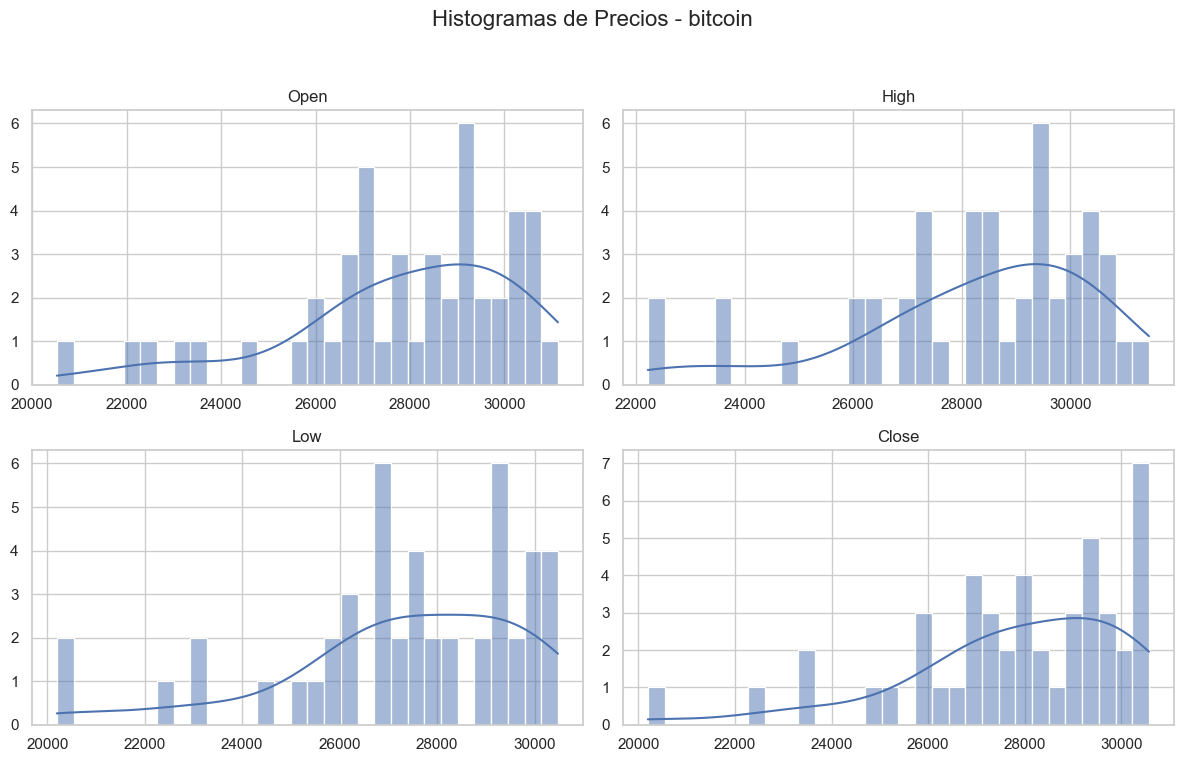

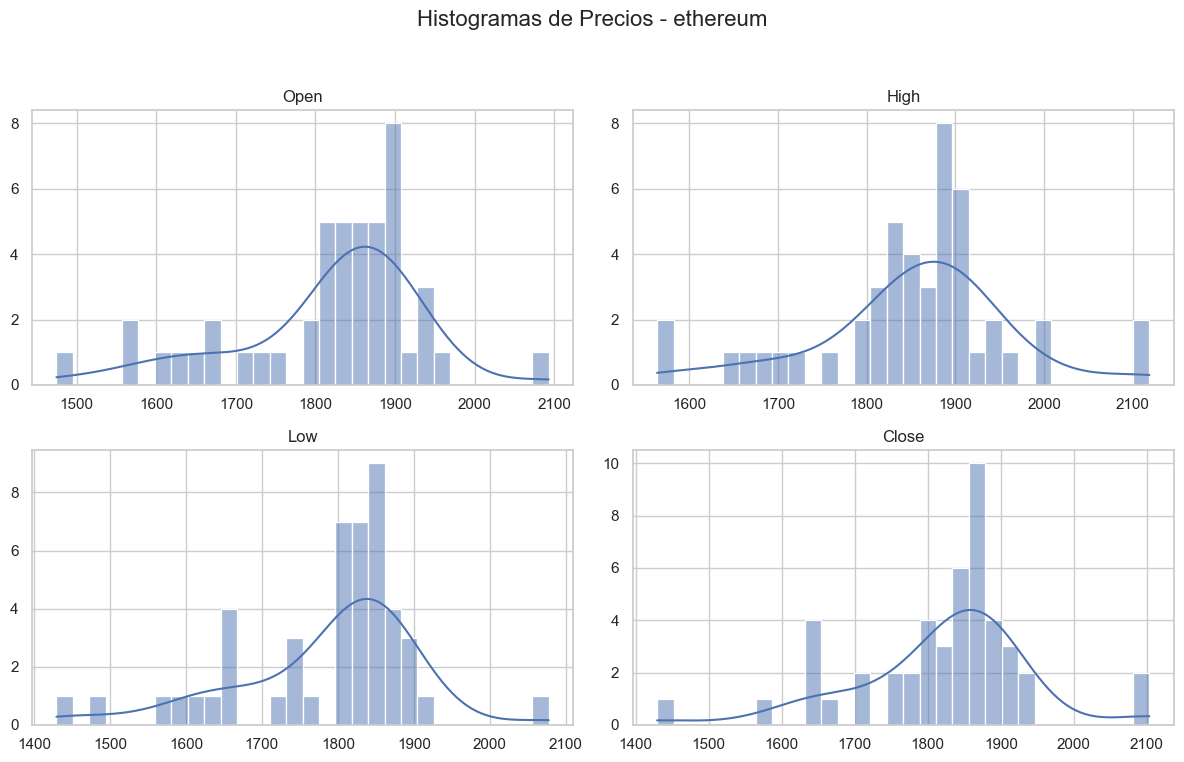

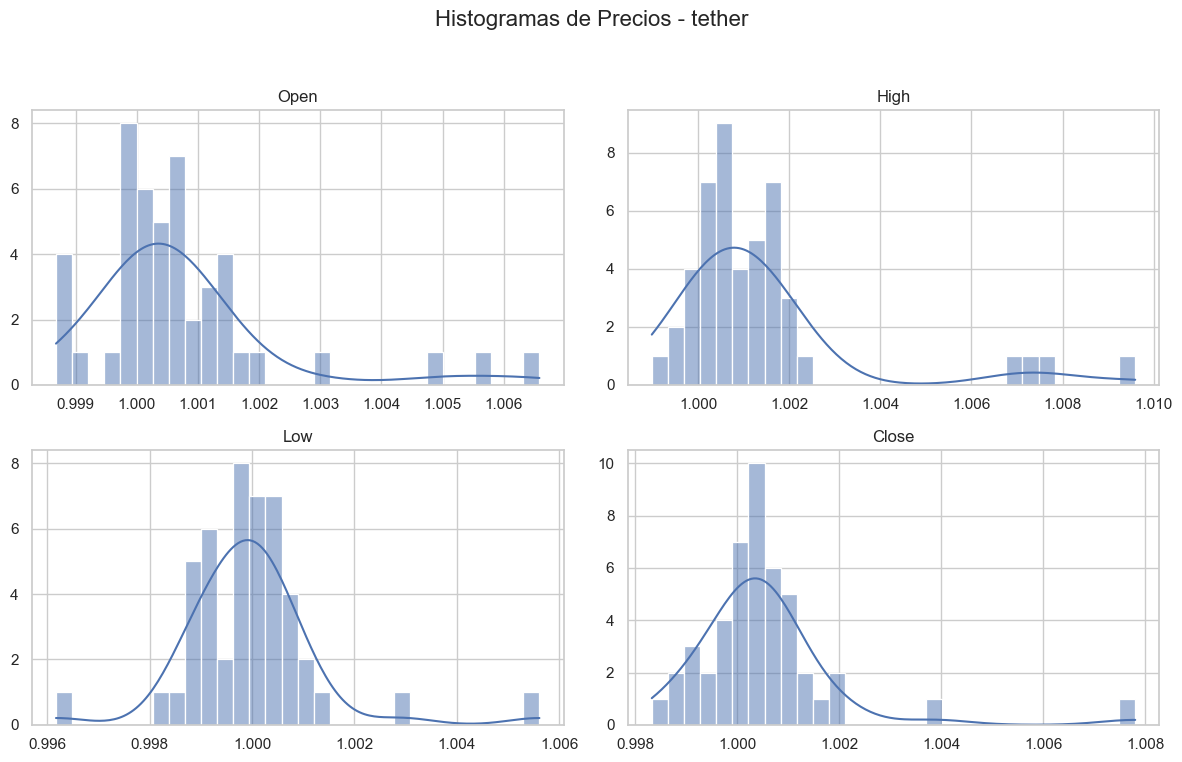

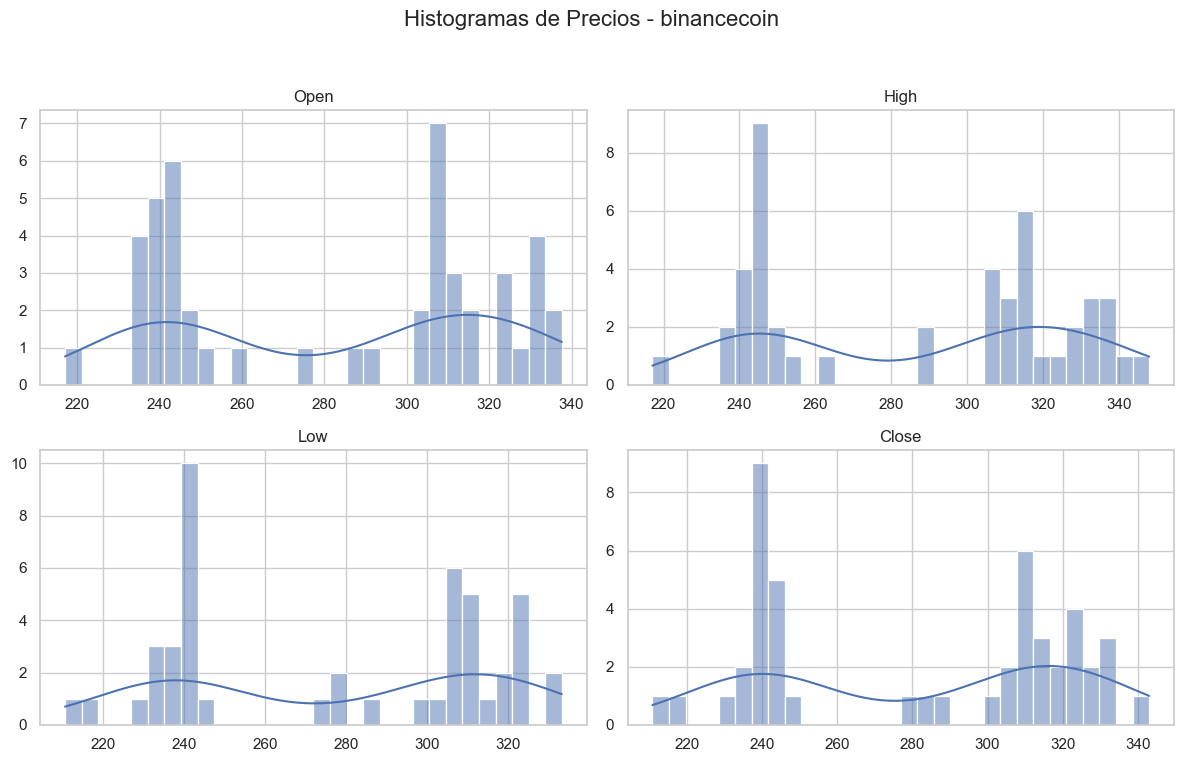

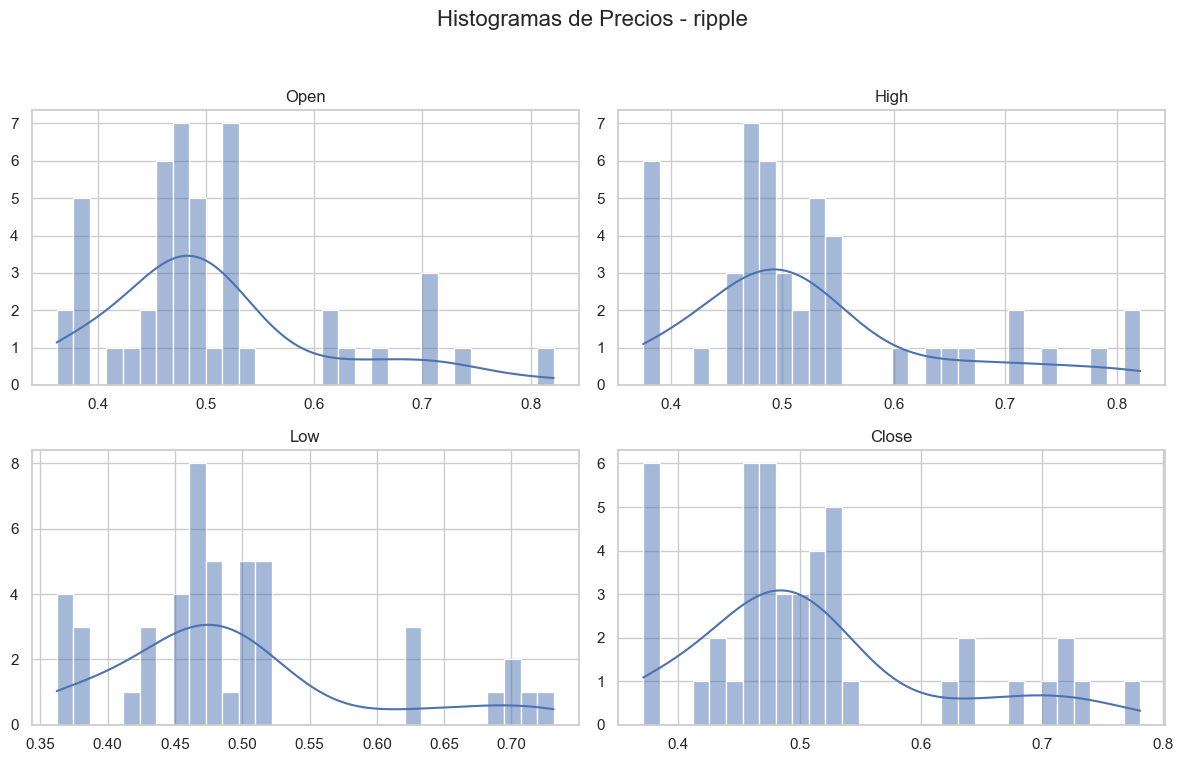

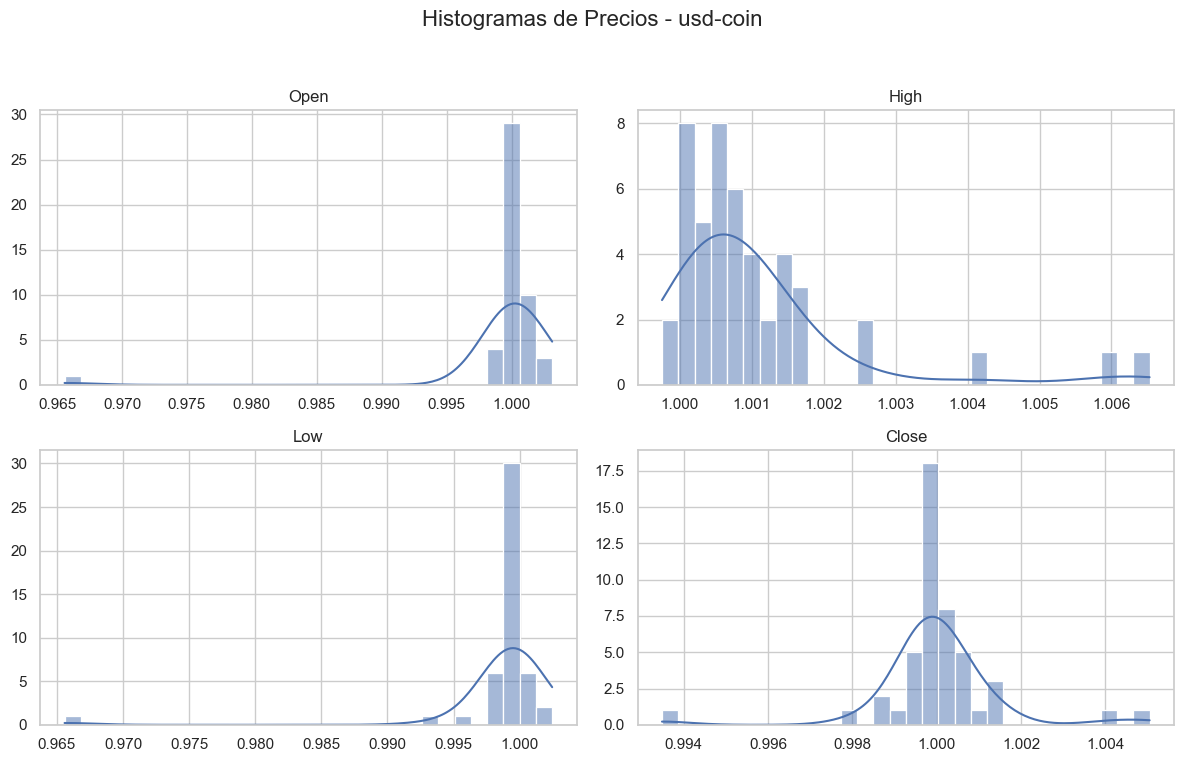

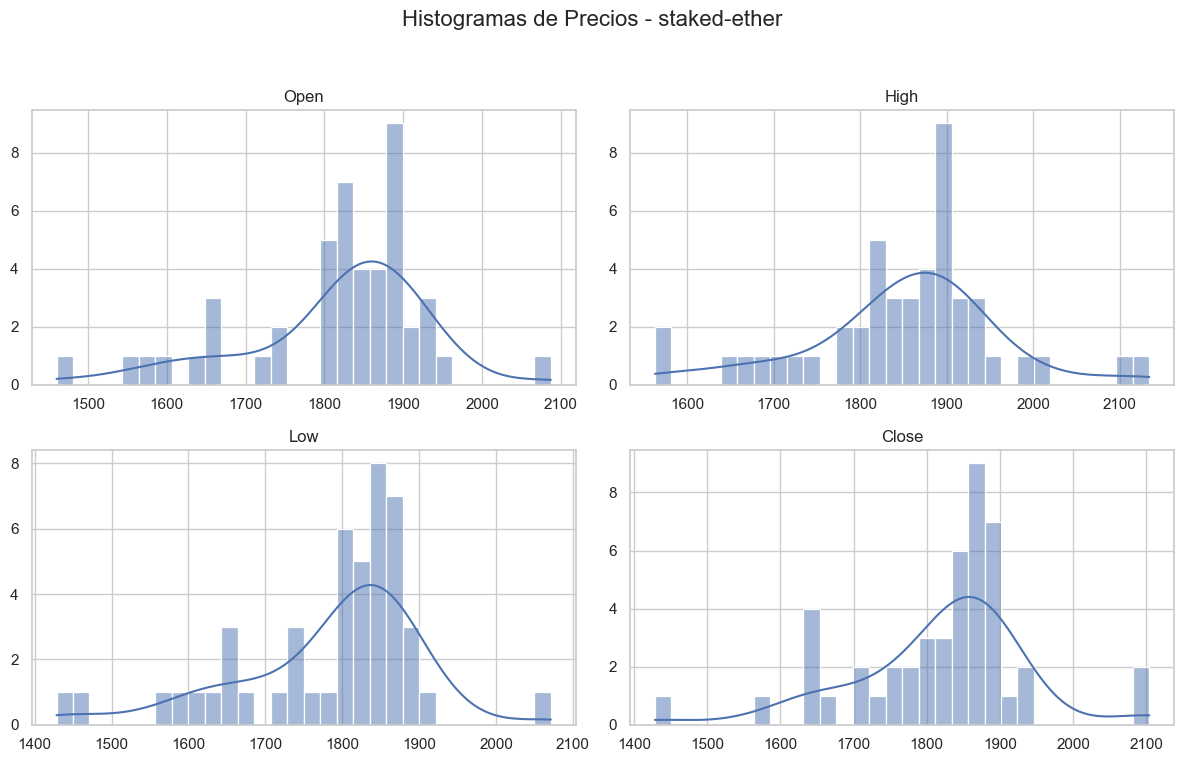

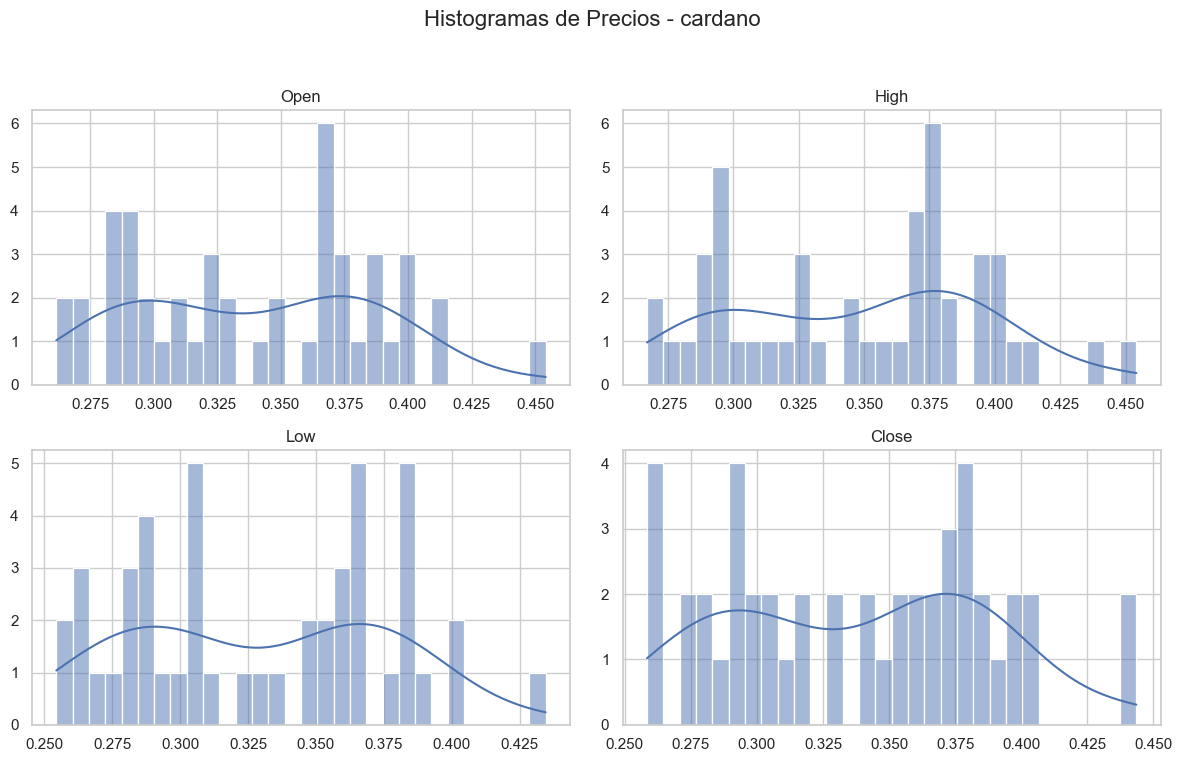

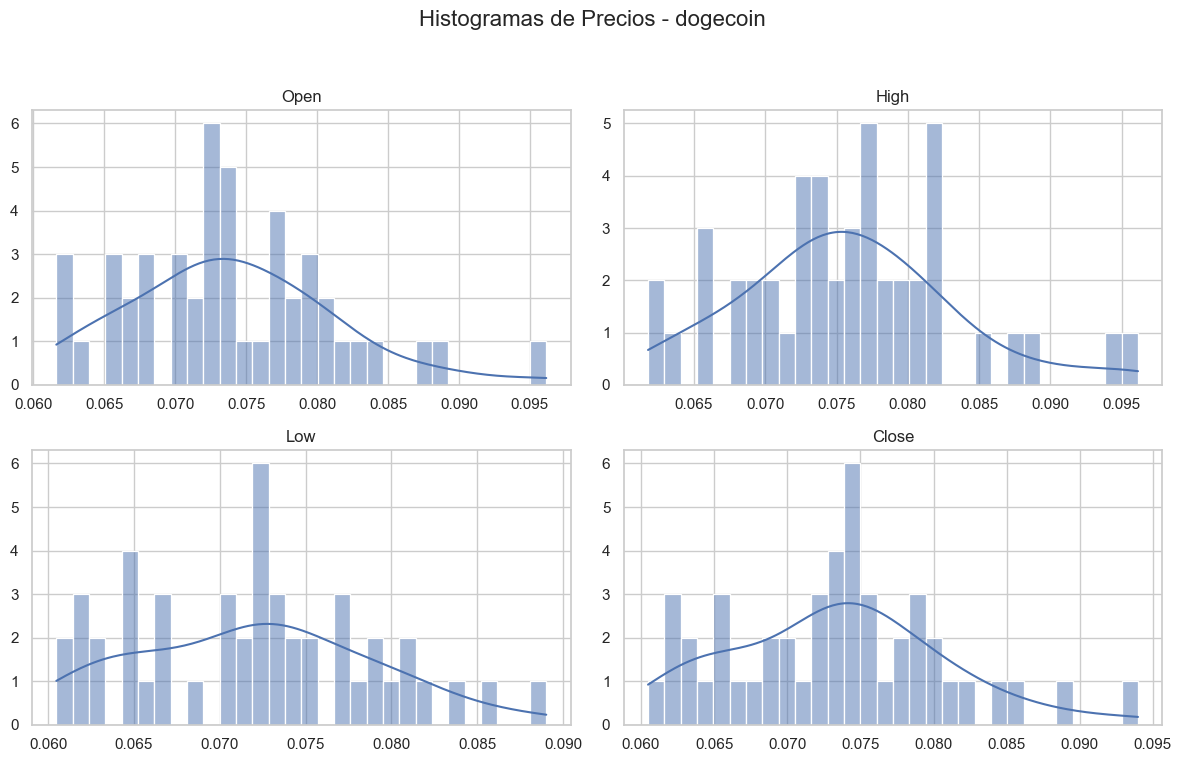

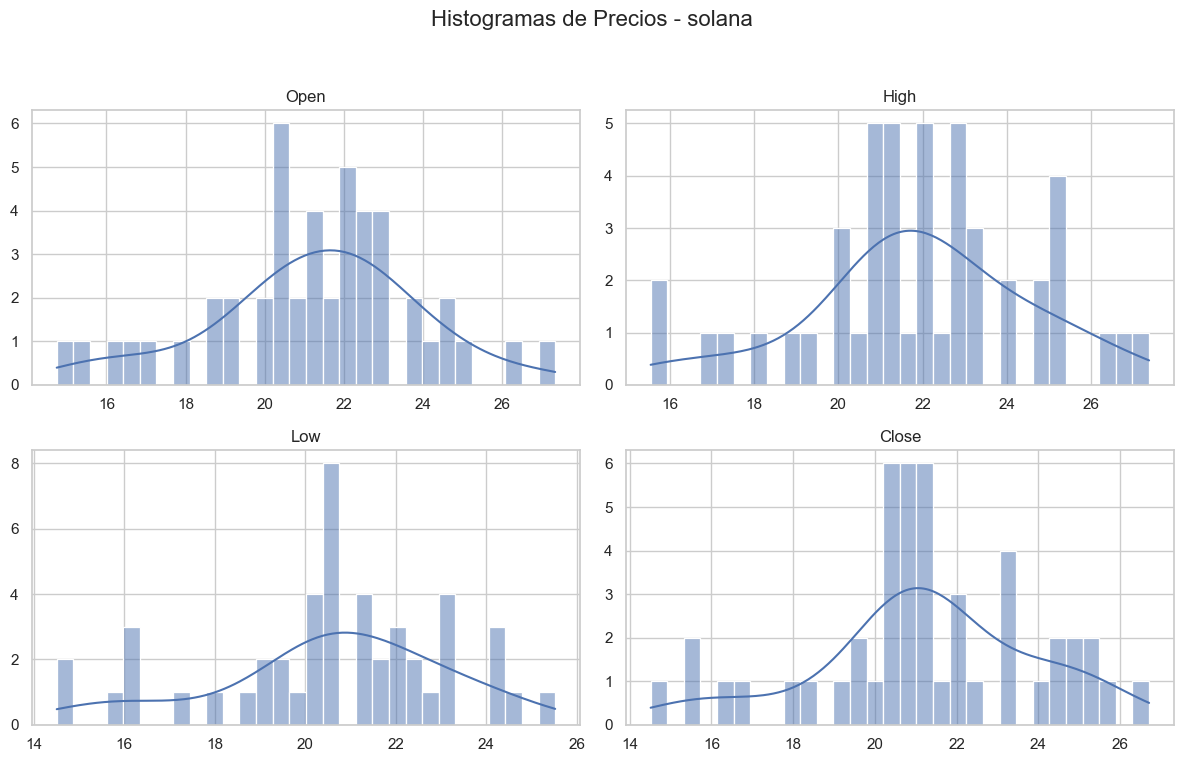

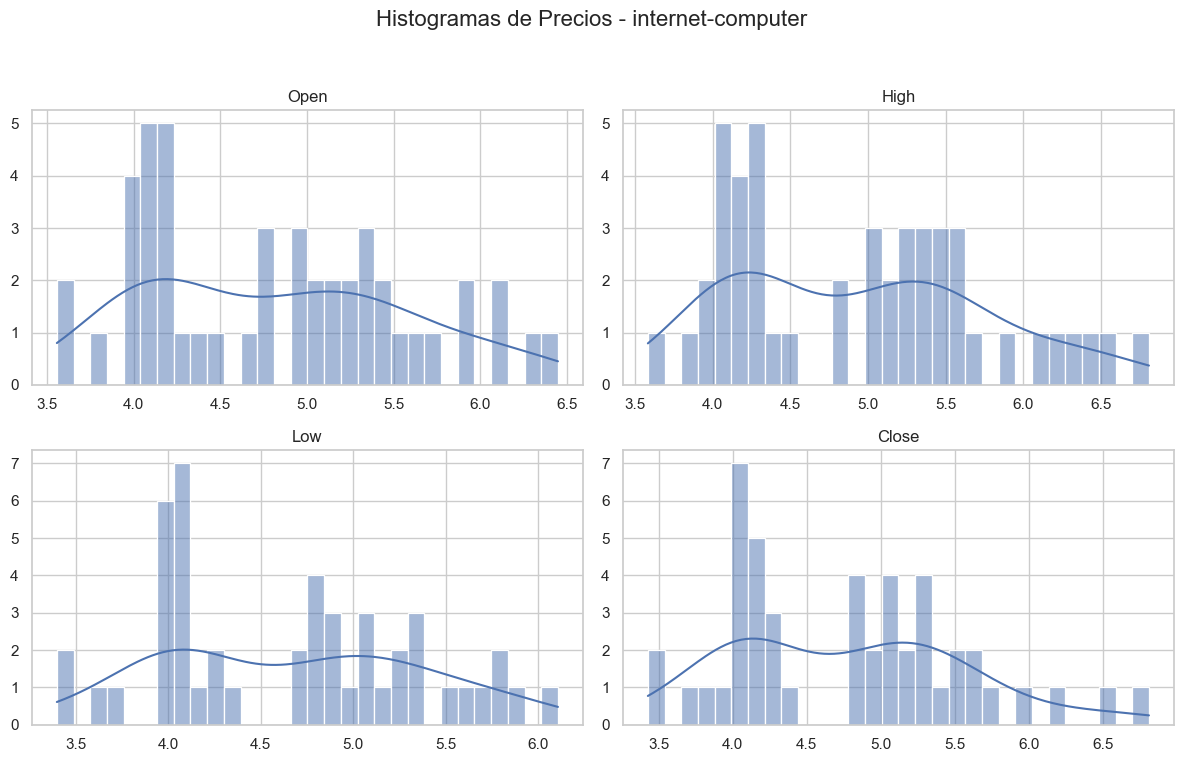

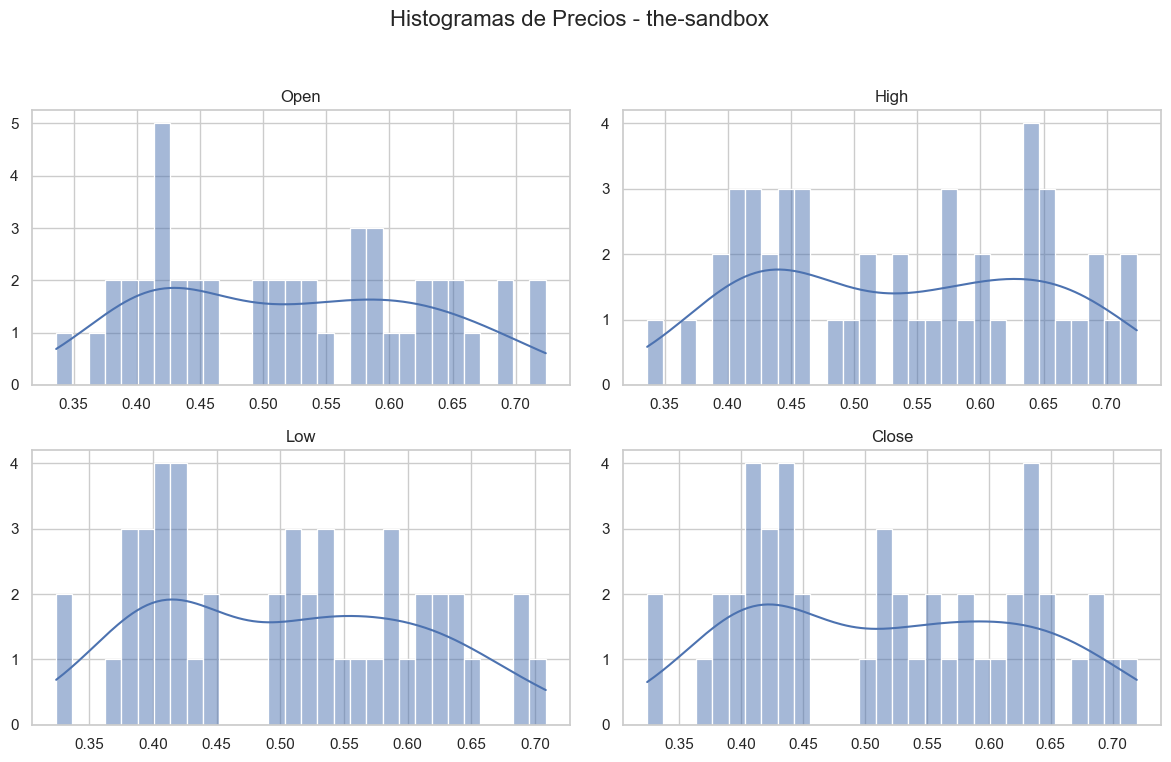

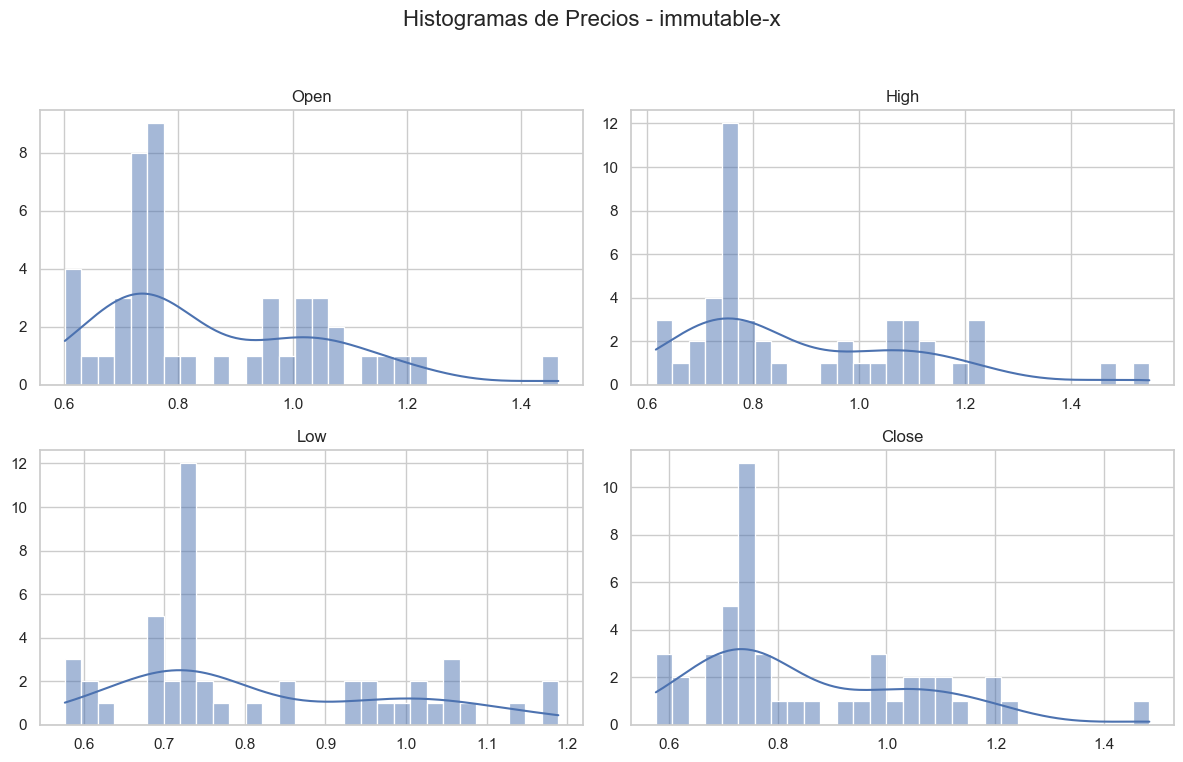

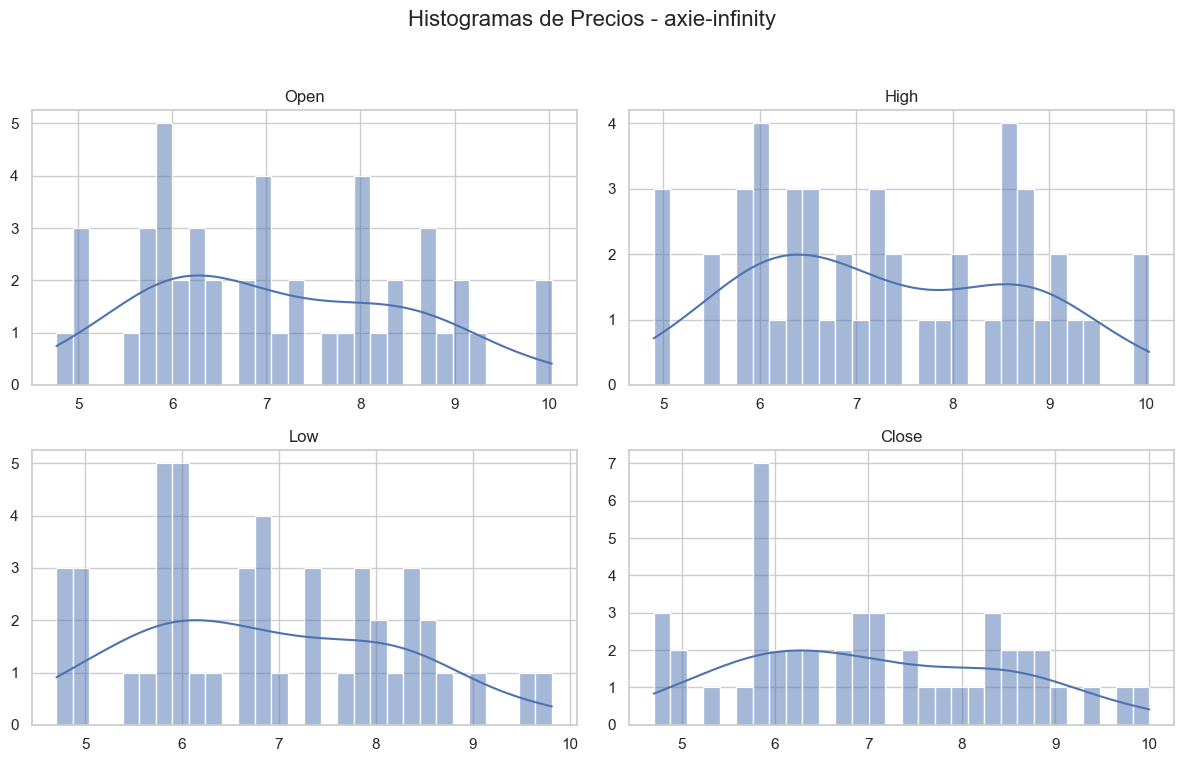

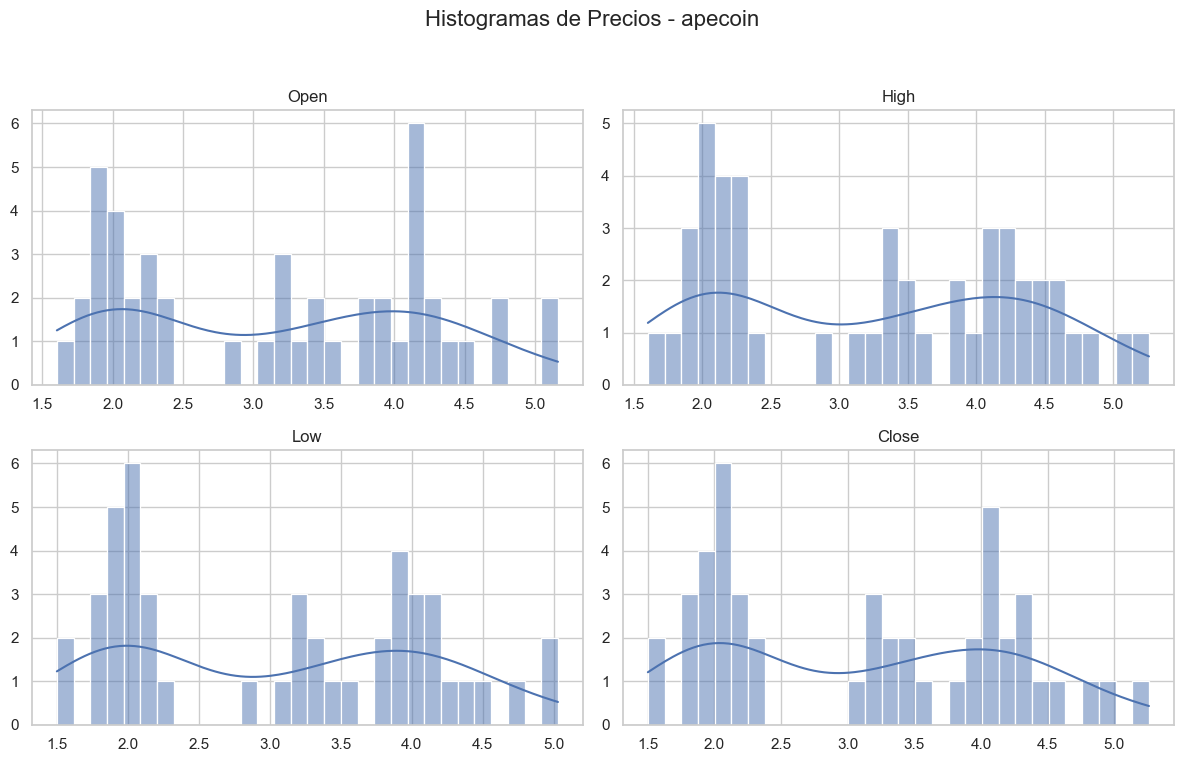

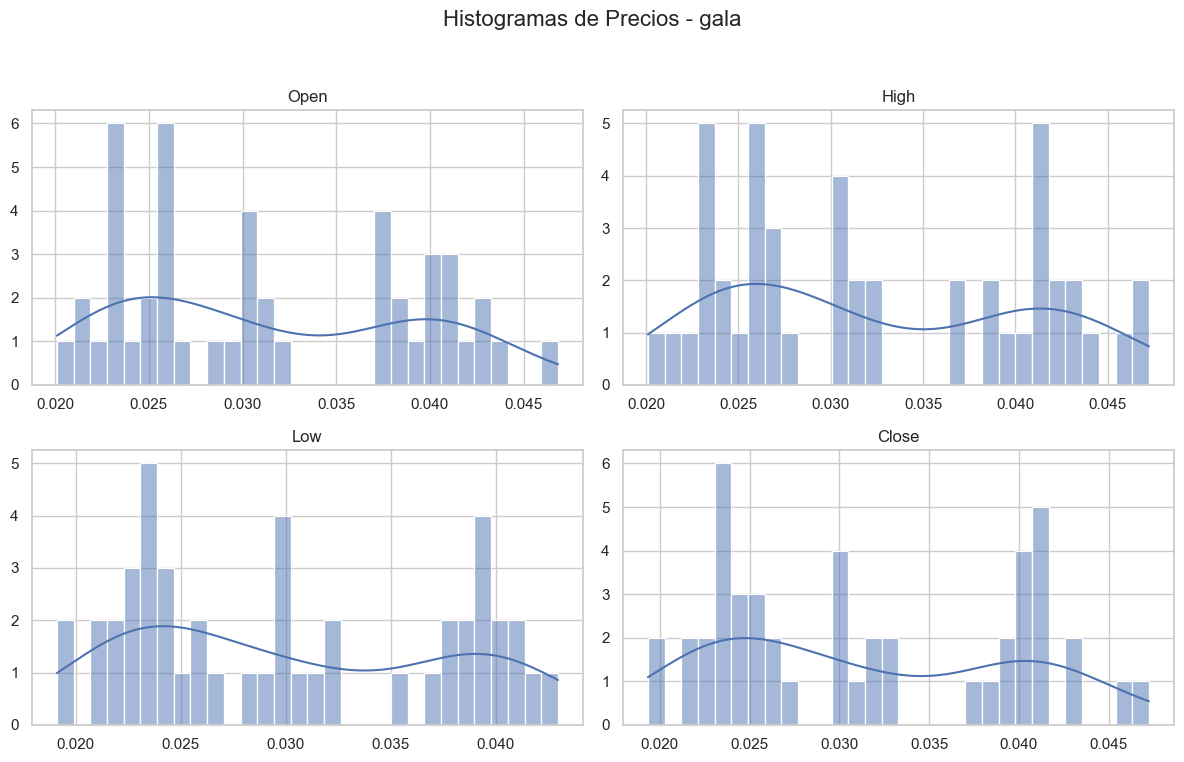

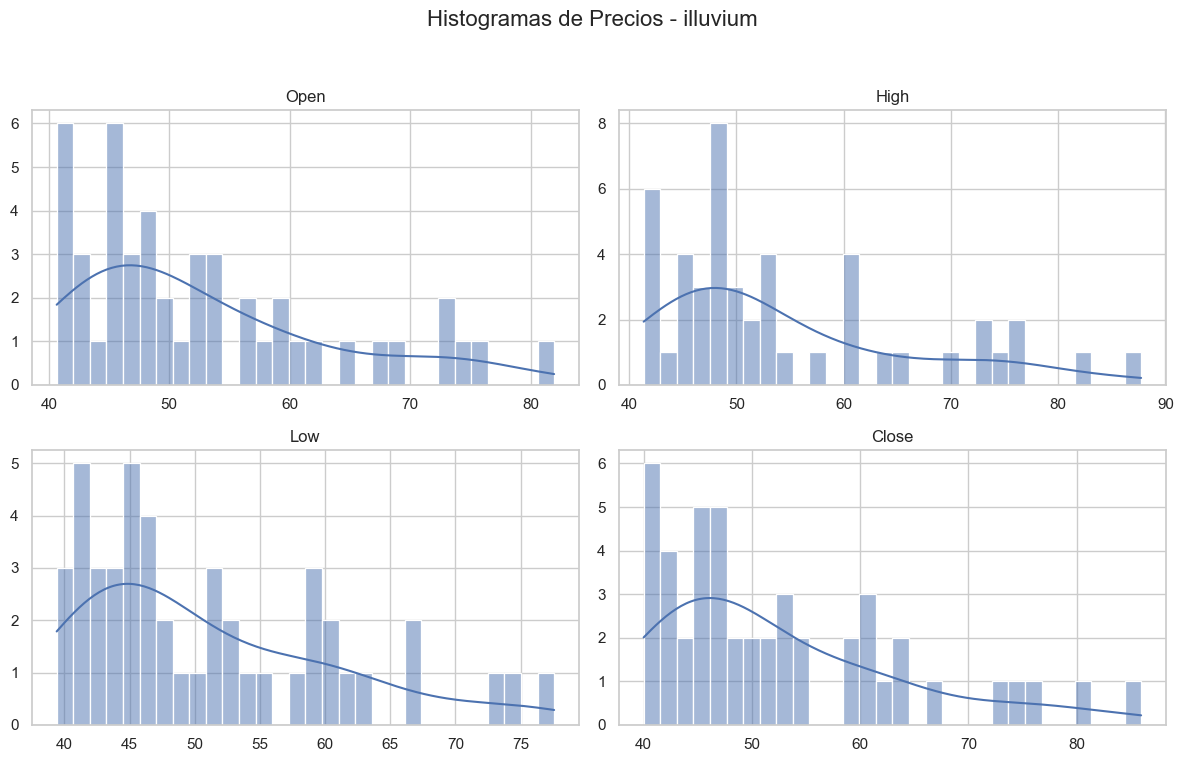

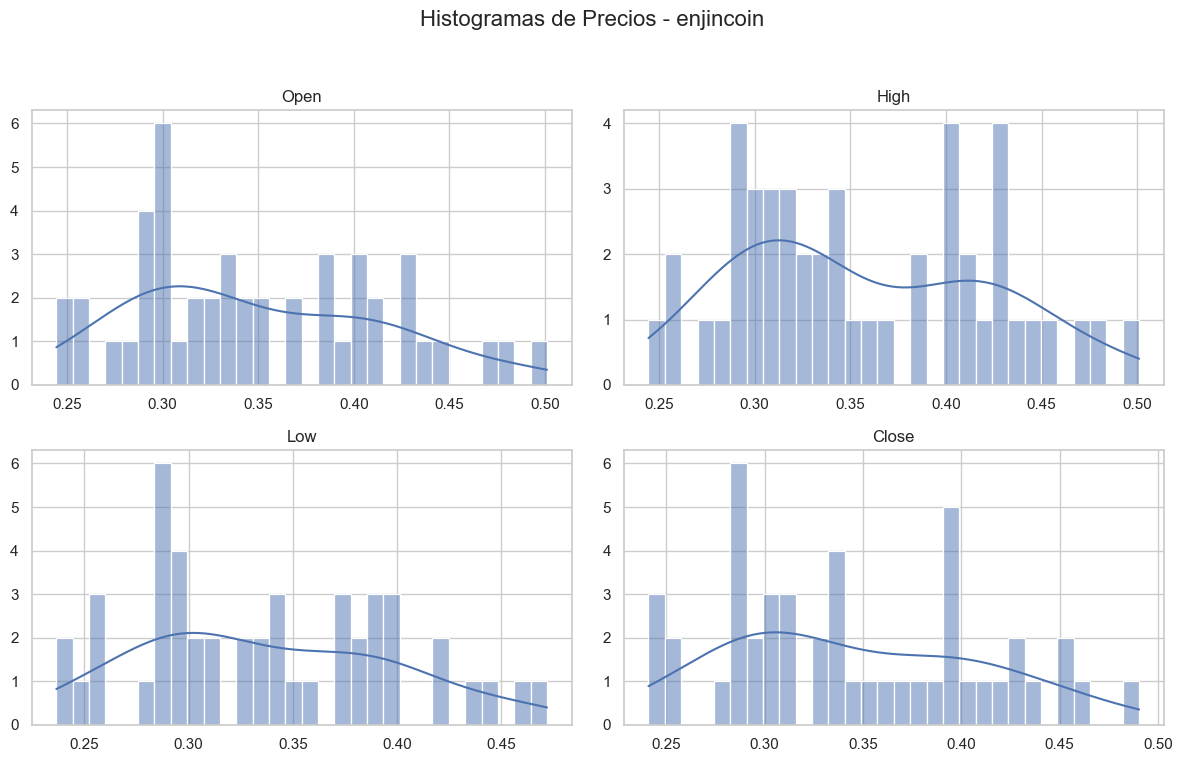

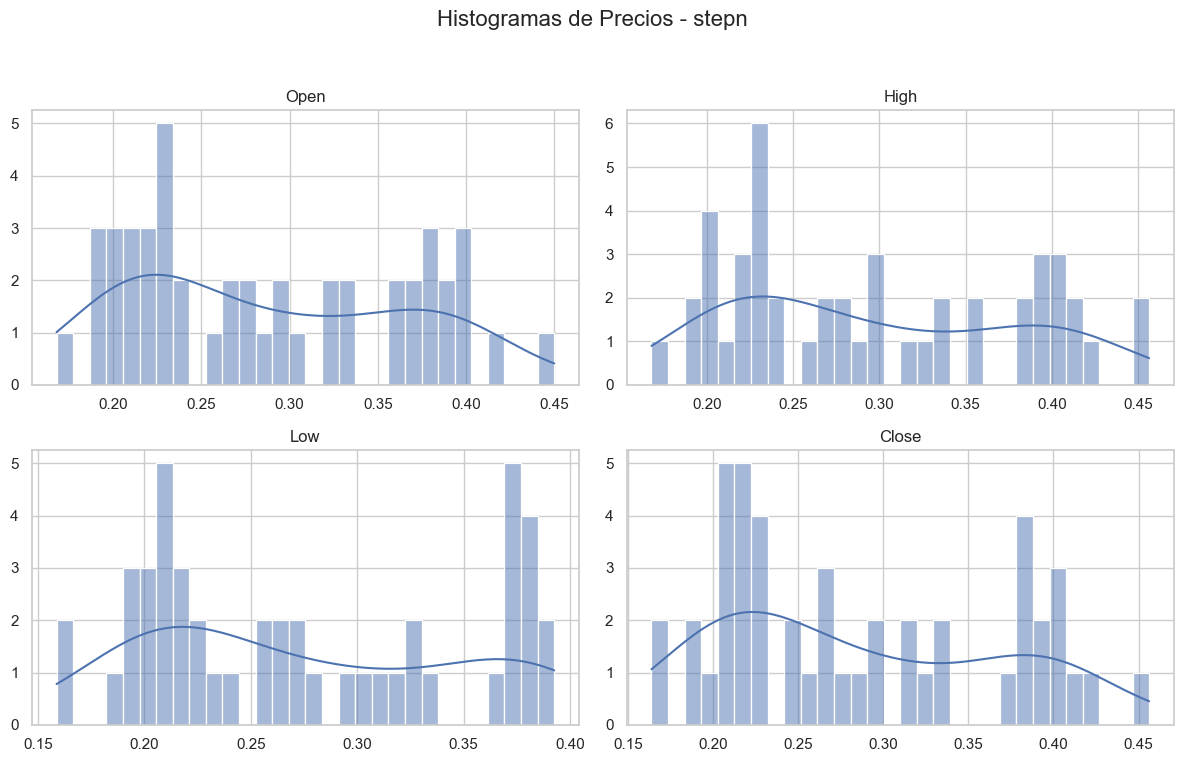

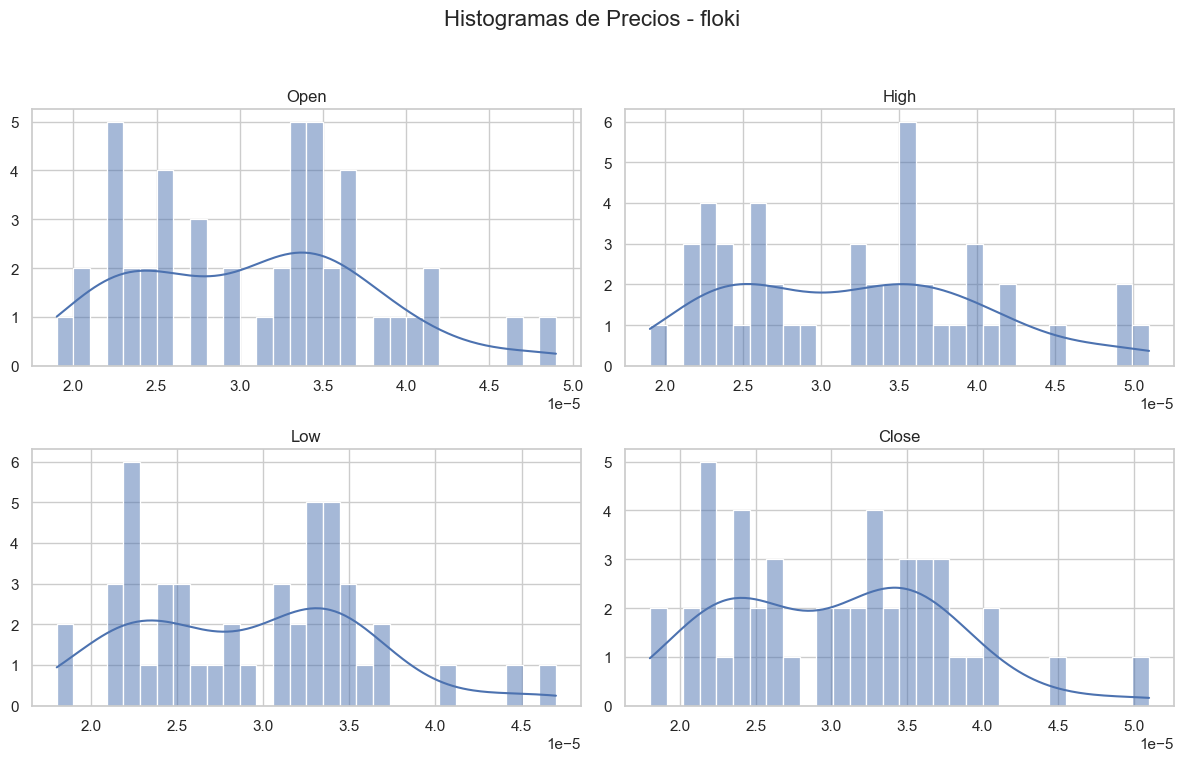

In [85]:
# Configurar el estilo de Seaborn
sns.set(style='whitegrid')

for i, crypto in enumerate(combined_top_coins):
    # Filtrar el DataFrame para la criptomoneda actual
    df_crypto_ohlc = df_ohlc[df_ohlc['Criptomoneda'] == crypto]

    # Crear subplots para cada columna
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
    fig.suptitle(f'Histogramas de Precios - {crypto}', fontsize=16)

    # Iterar a través de las columnas y crear histogramas
    for i, col_ohlc in enumerate(columnas_ohlc):
        row = i // 2
        col = i % 2
        sns.histplot(df_crypto_ohlc[col_ohlc], ax=axes[row, col], kde=True, bins=30)       
        axes[row, col].set_title(col_ohlc, fontsize=12)
        axes[row, col].set_xlabel('')
        axes[row, col].set_ylabel('')

    # Ajustar el espaciado entre subplots
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Mostrar los histogramas
    plt.show()


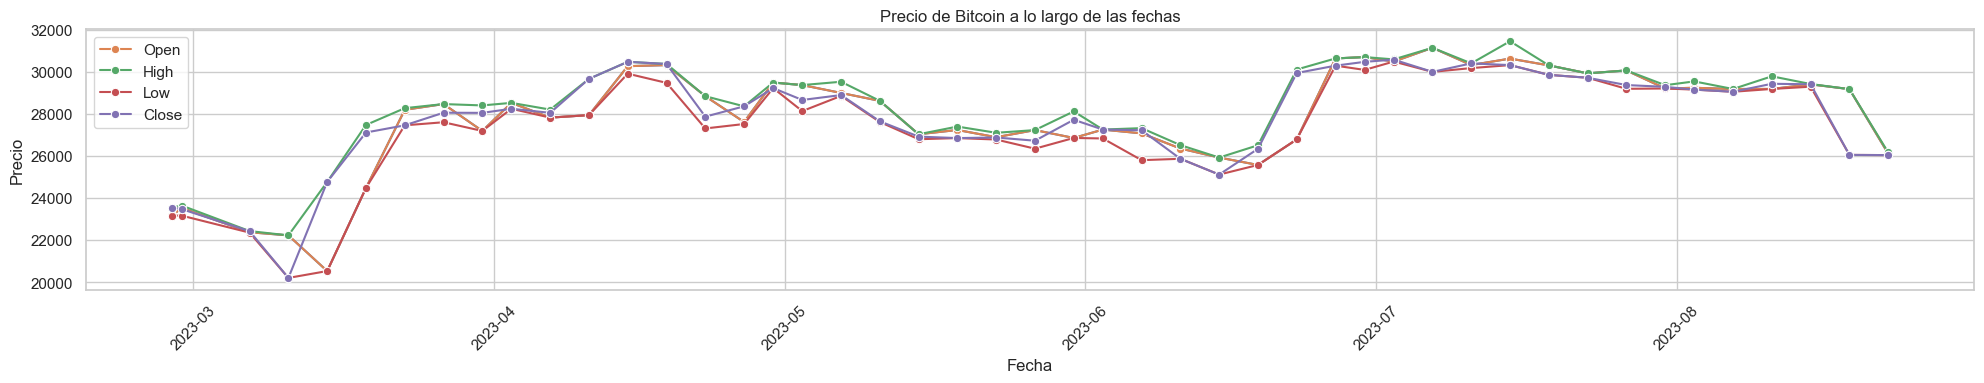

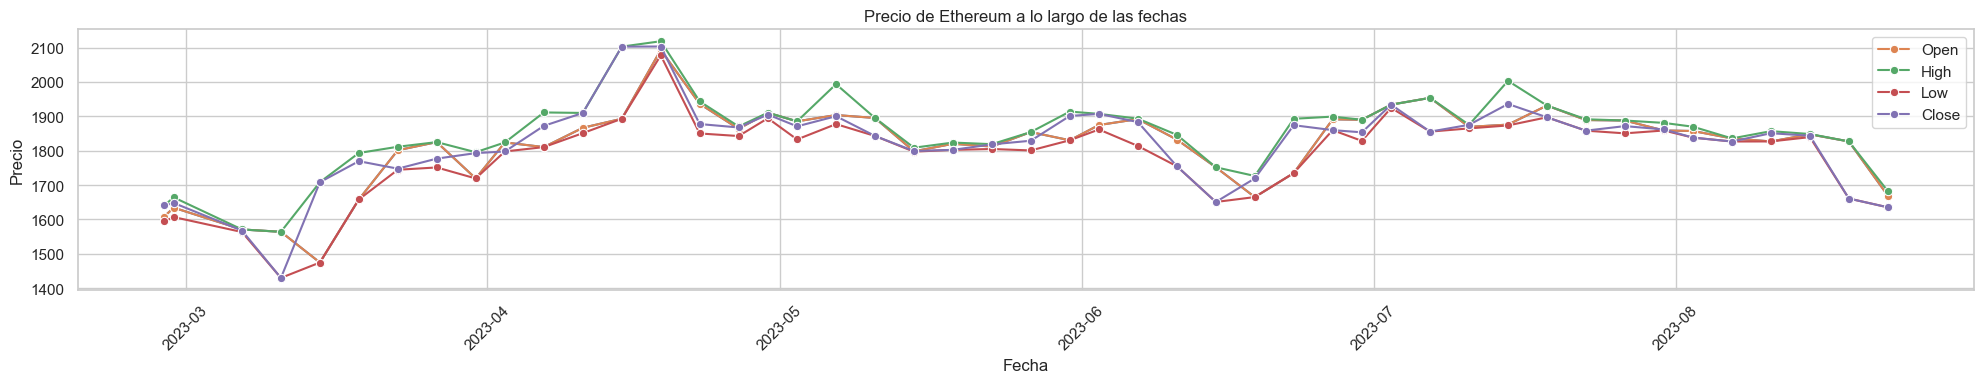

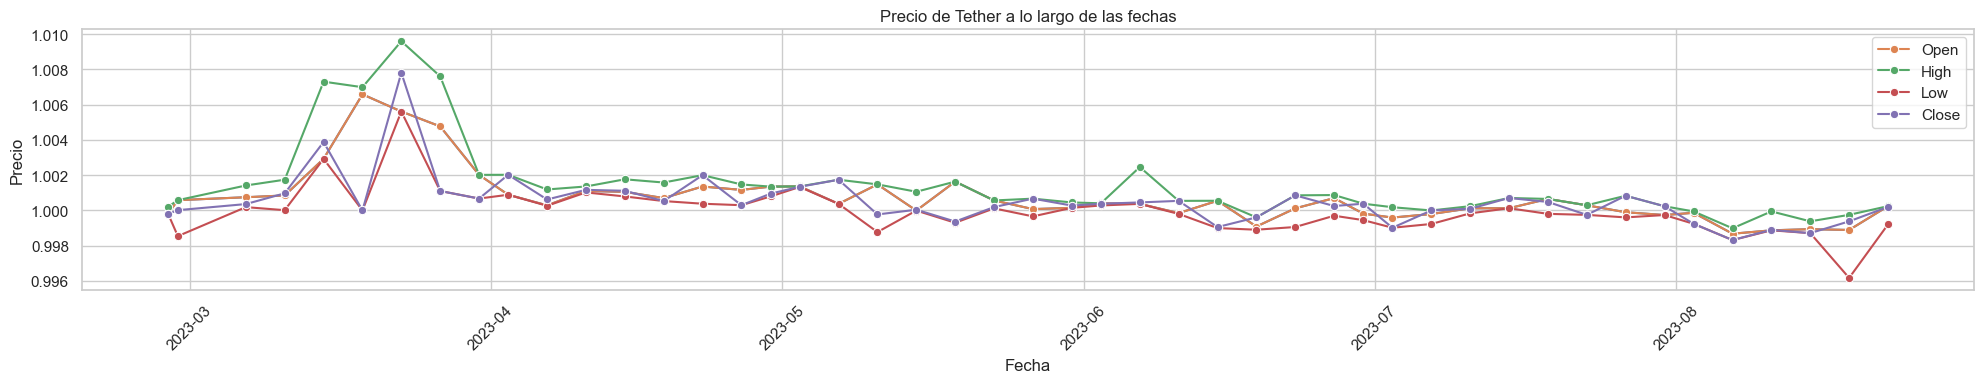

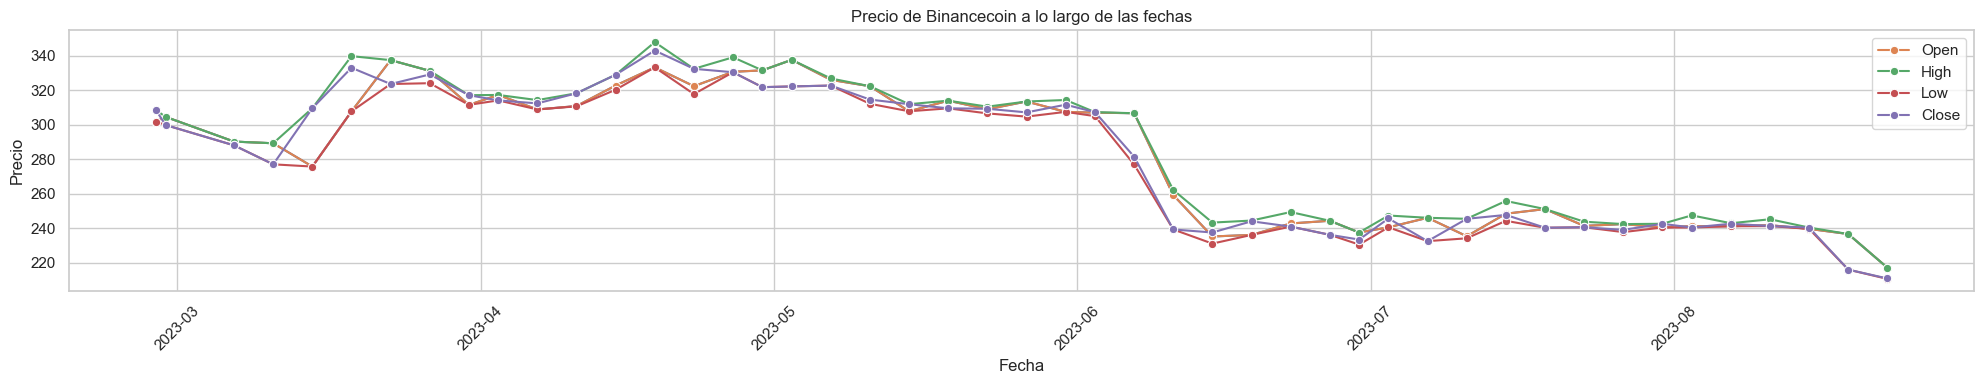

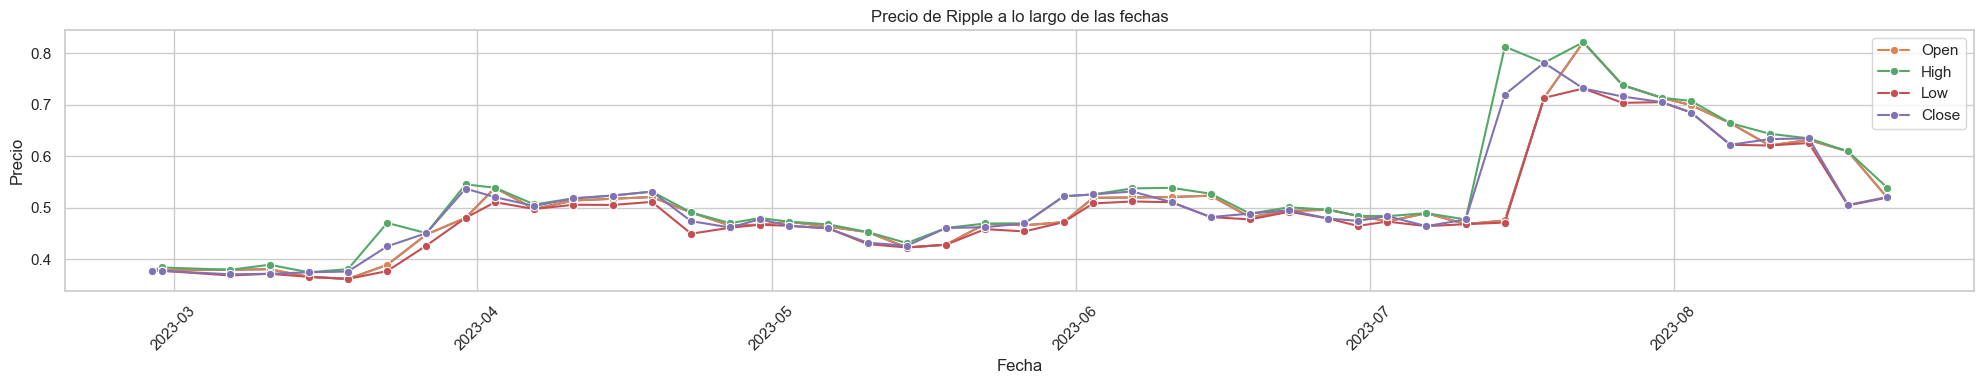

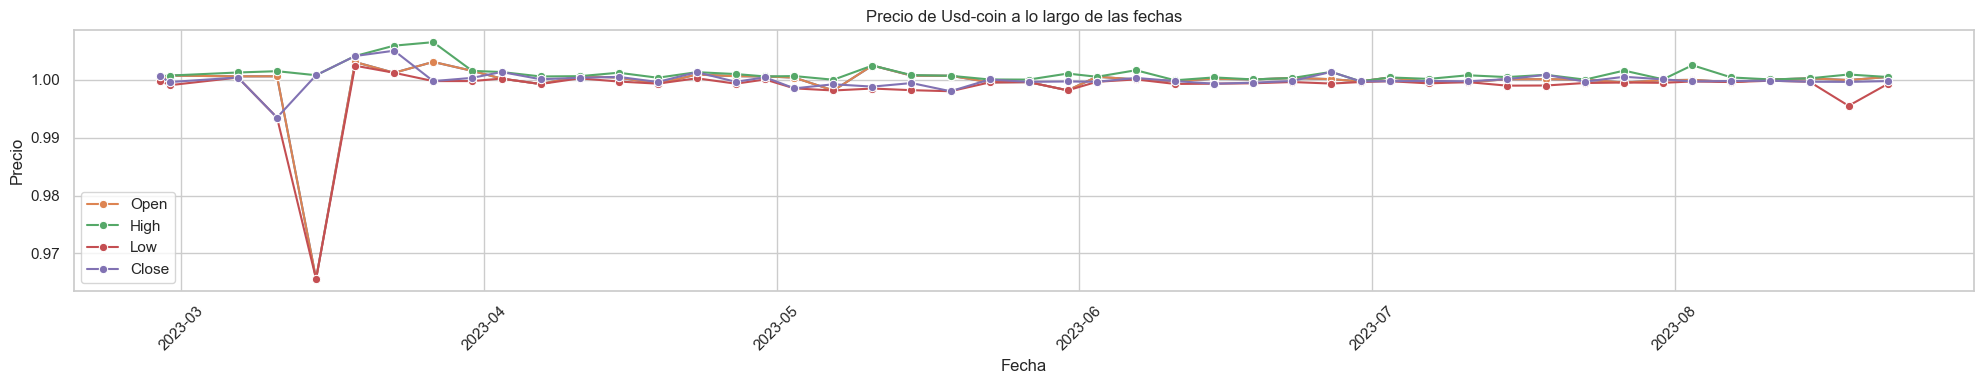

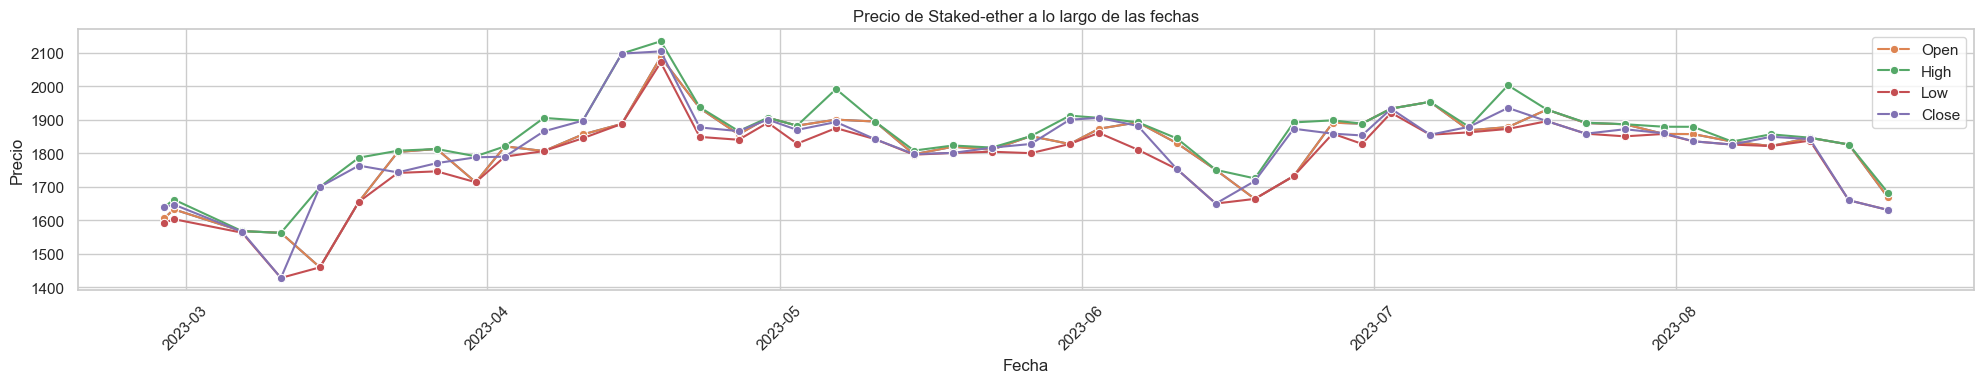

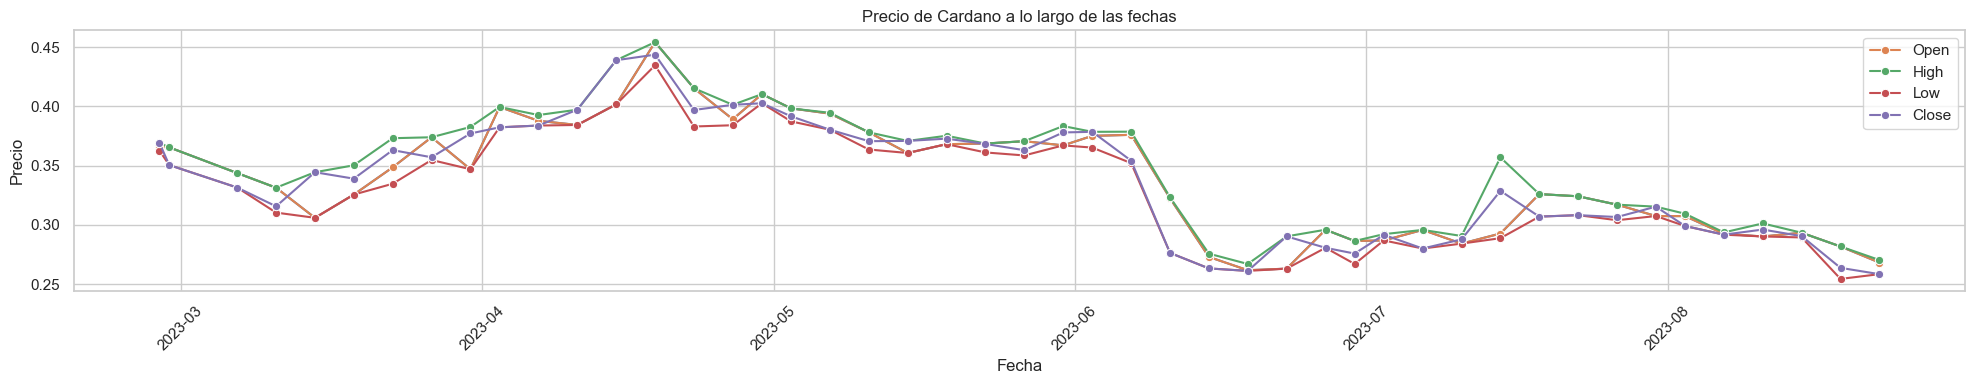

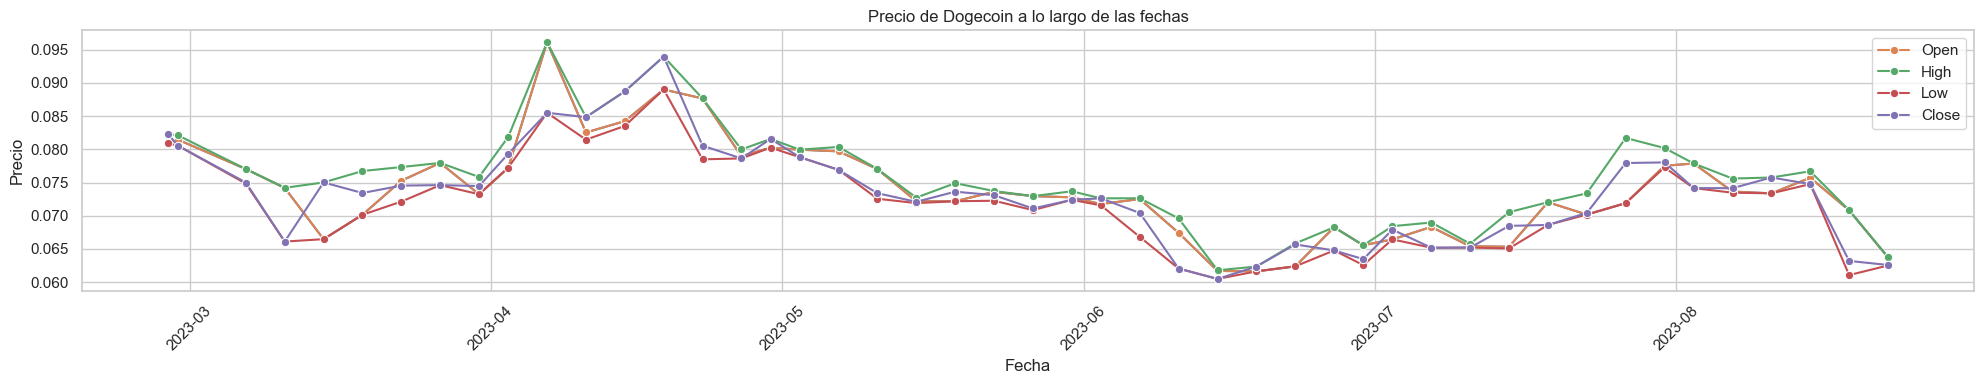

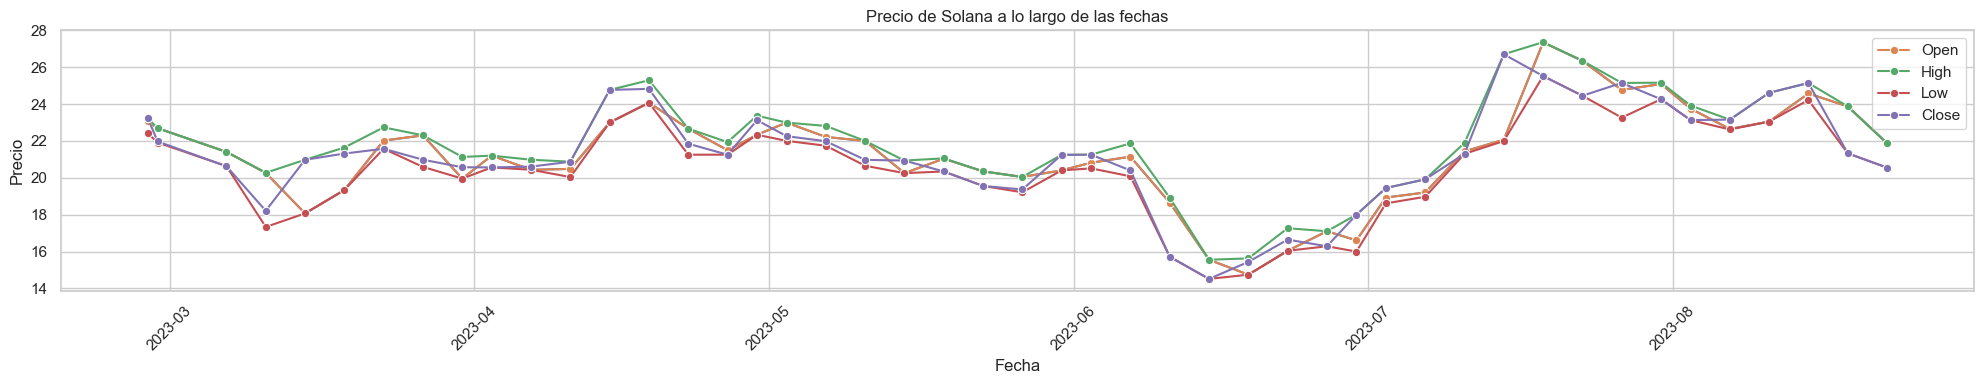

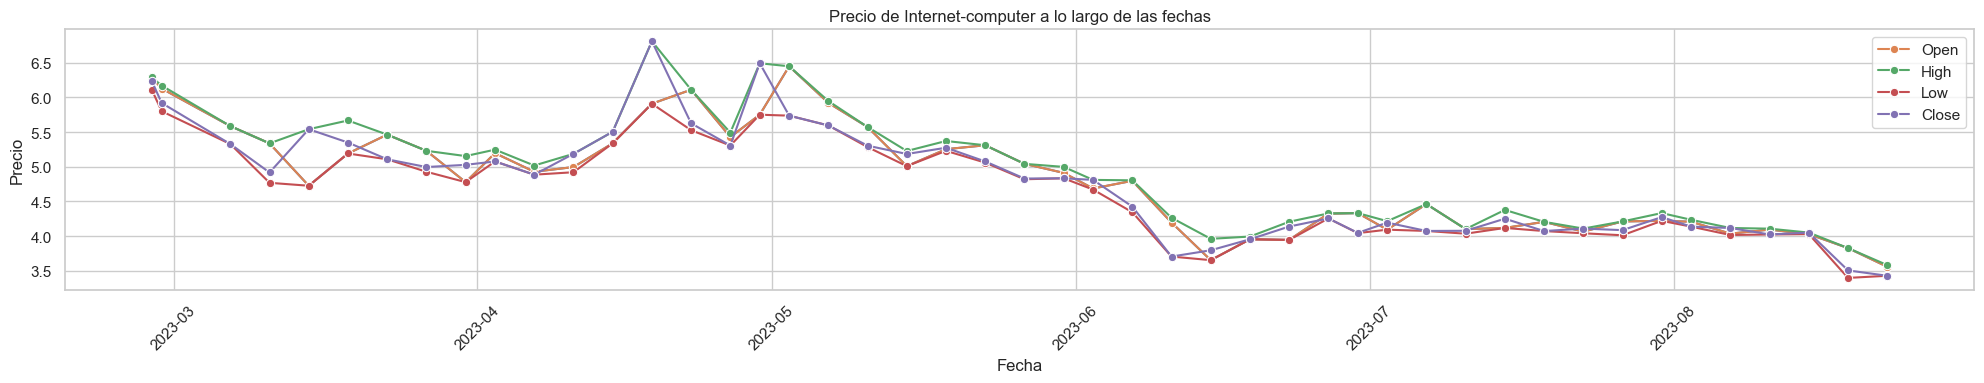

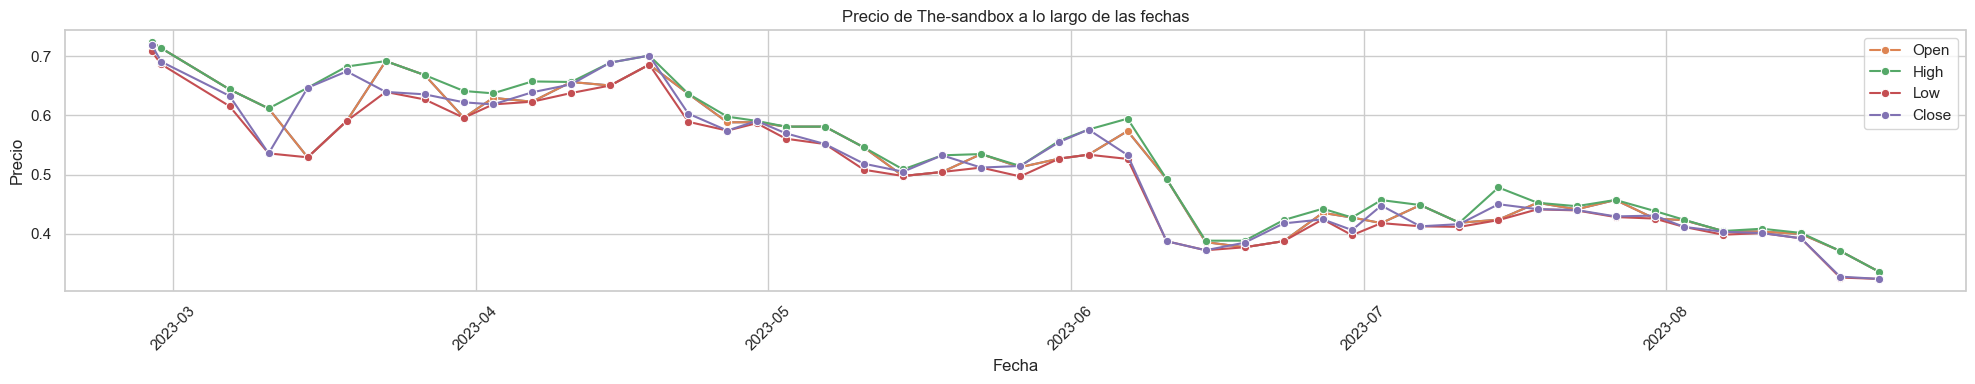

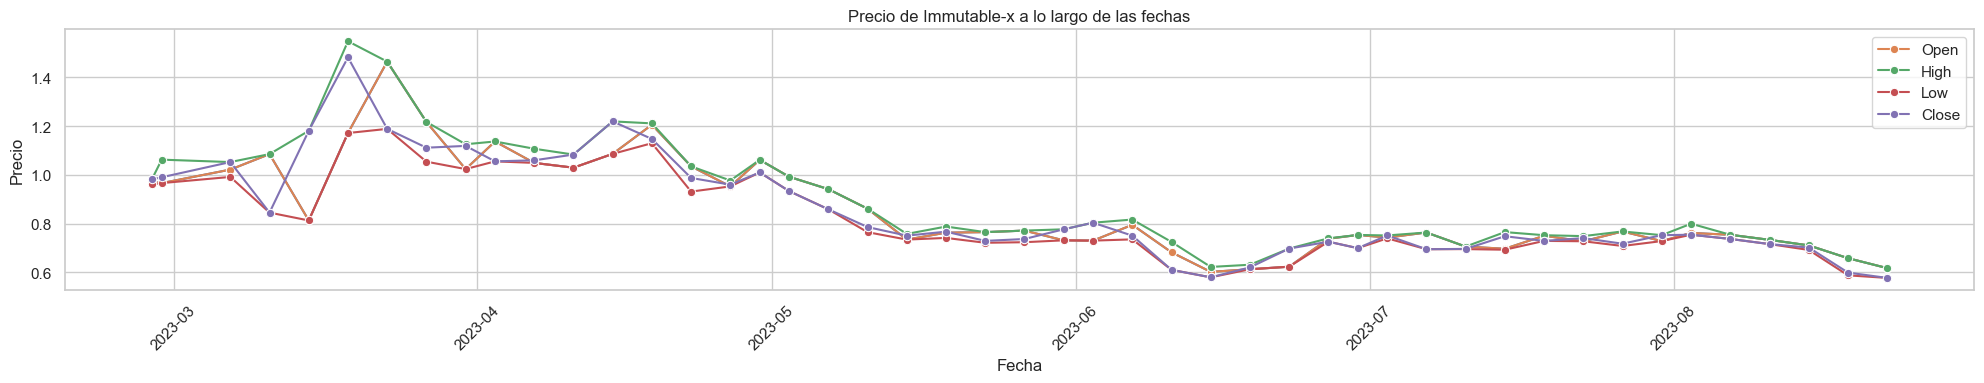

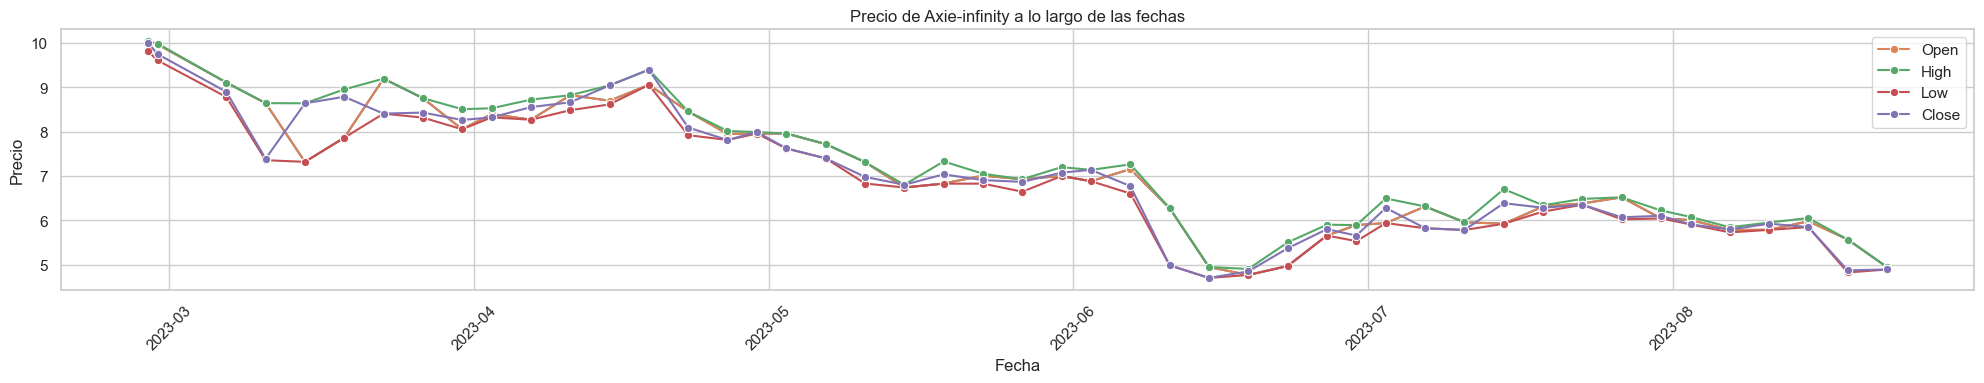

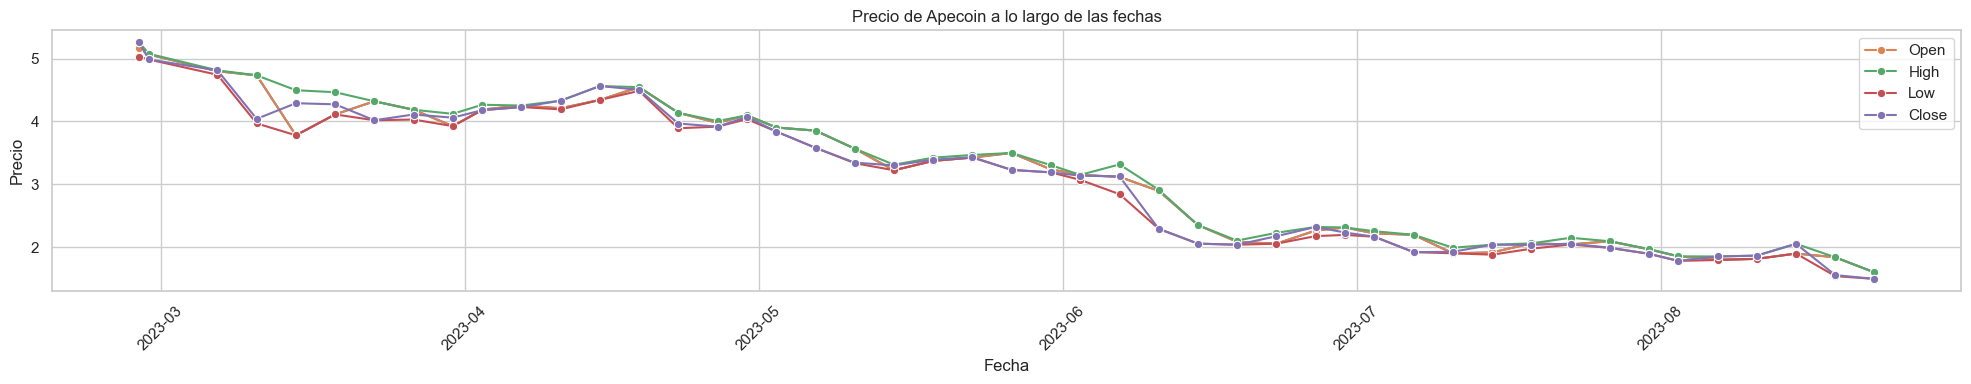

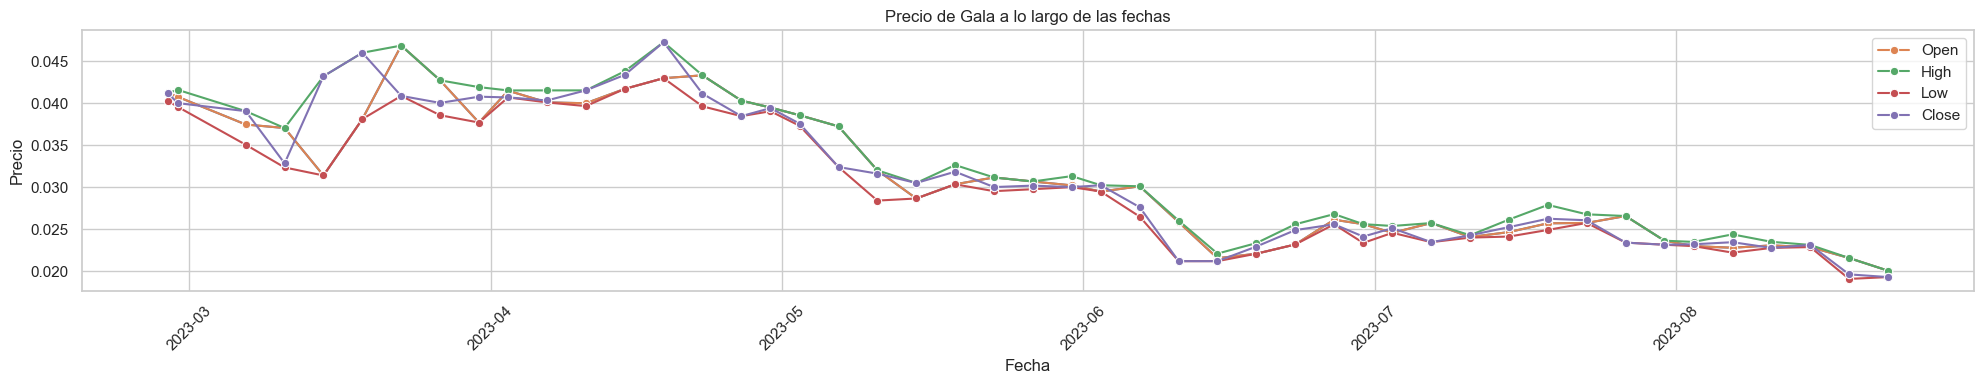

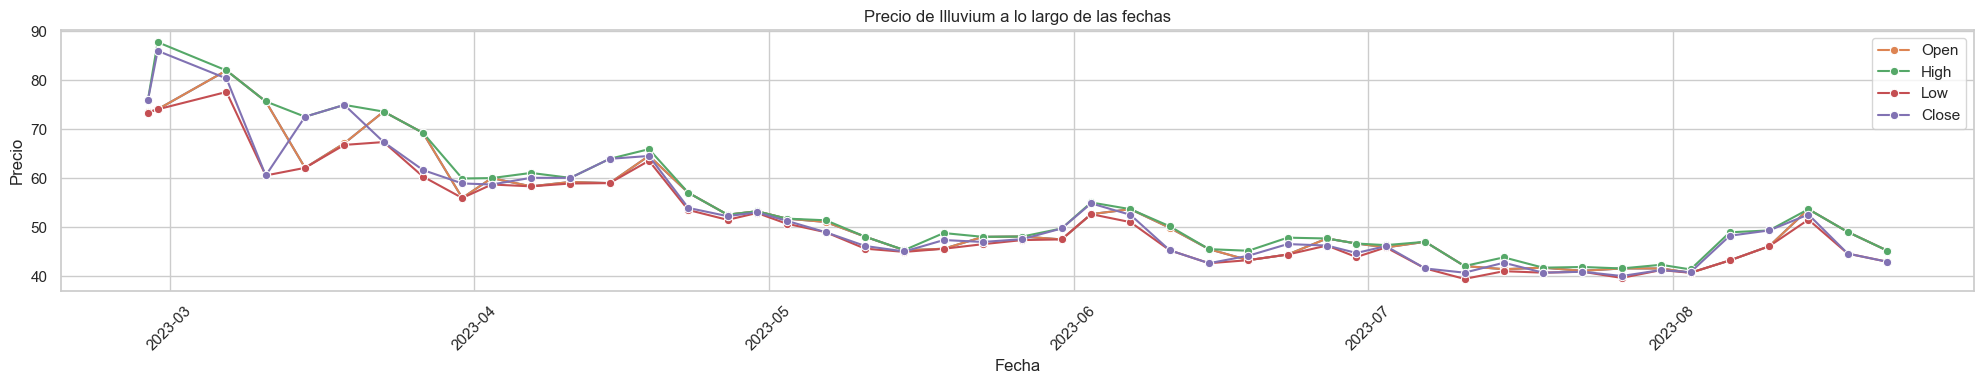

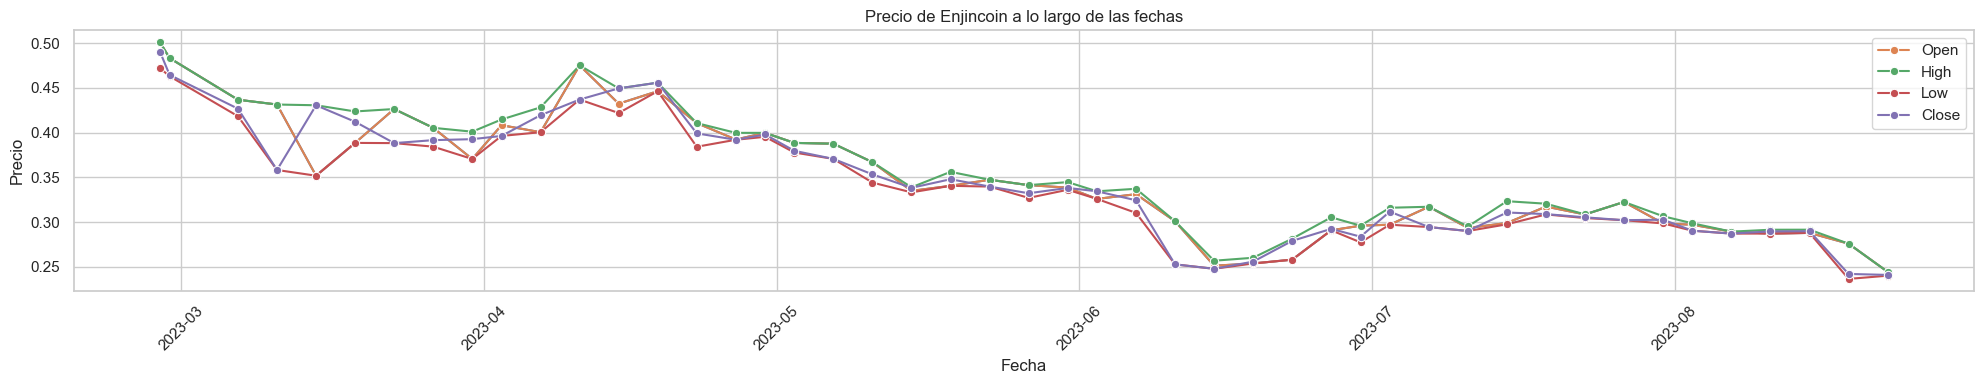

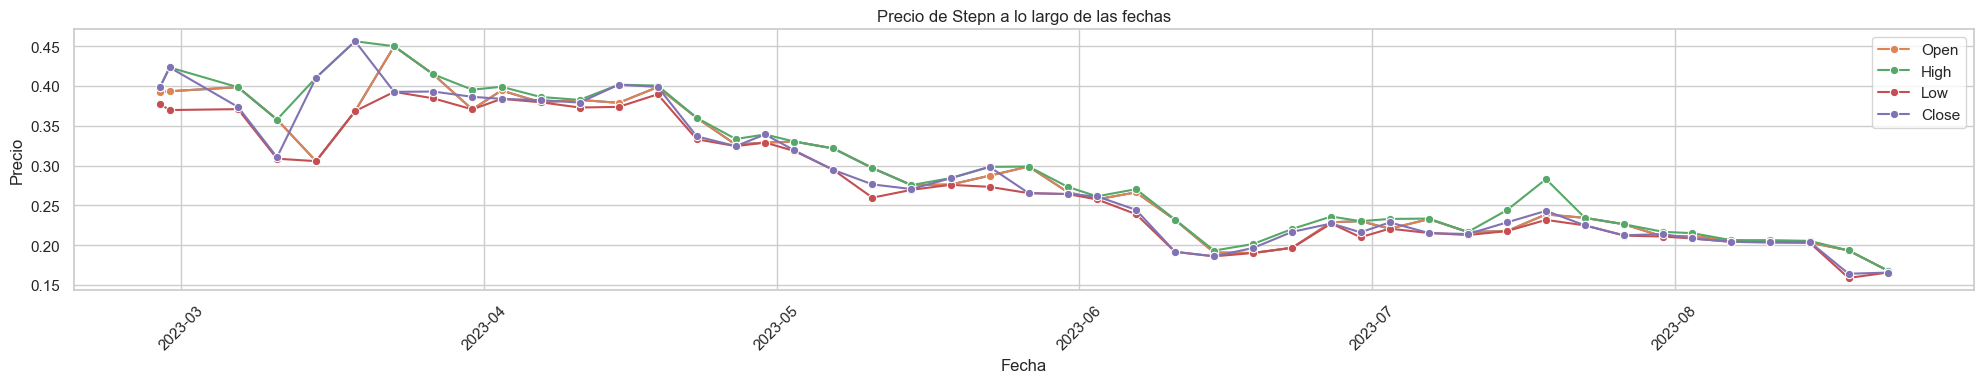

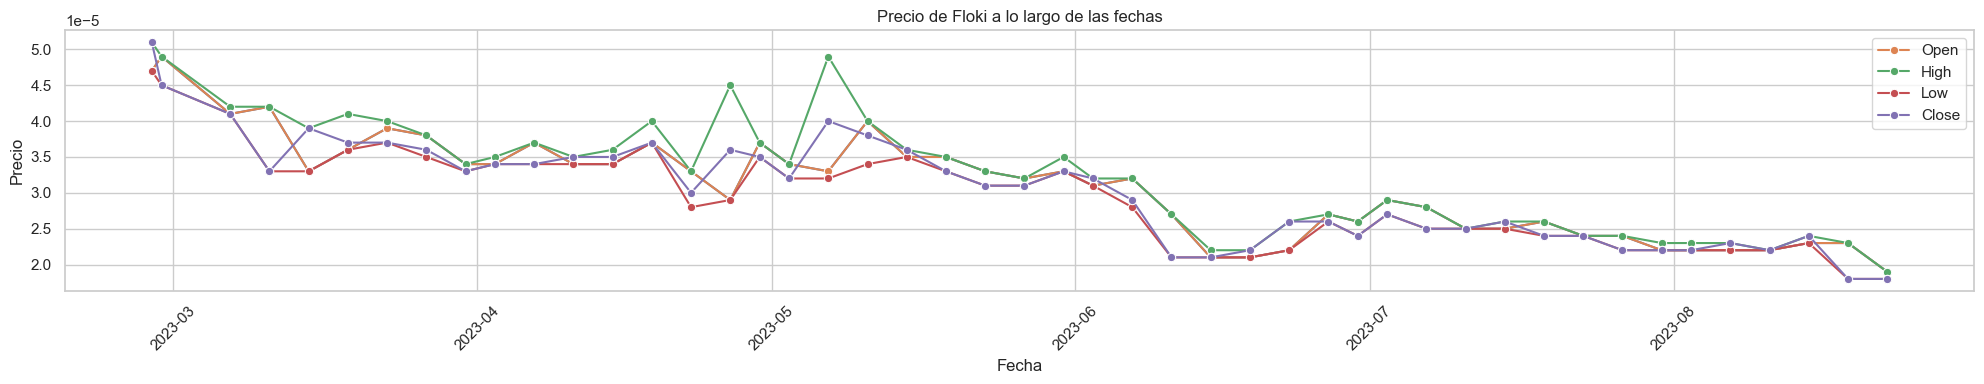

In [93]:
sns.set(style="whitegrid")

# Crear un gráfico por cada criptomoneda
#criptomonedas = df['Criptomoneda'].unique()
for cripto in combined_top_coins:
    plt.figure(figsize=(20, 4))
    df_cripto = df_ohlc[df_ohlc['Criptomoneda'] == cripto]
    sns.lineplot(x='Fecha', y='Open', data=df_cripto, marker='o')
    sns.lineplot(x='Fecha', y='Open', data=df_cripto, label='Open', marker='o')
    sns.lineplot(x='Fecha', y='High', data=df_cripto, label='High', marker='o')
    sns.lineplot(x='Fecha', y='Low', data=df_cripto, label='Low', marker='o')
    sns.lineplot(x='Fecha', y='Close', data=df_cripto, label='Close', marker='o')

    plt.title(f'Precio de {cripto.capitalize()} a lo largo de las fechas')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


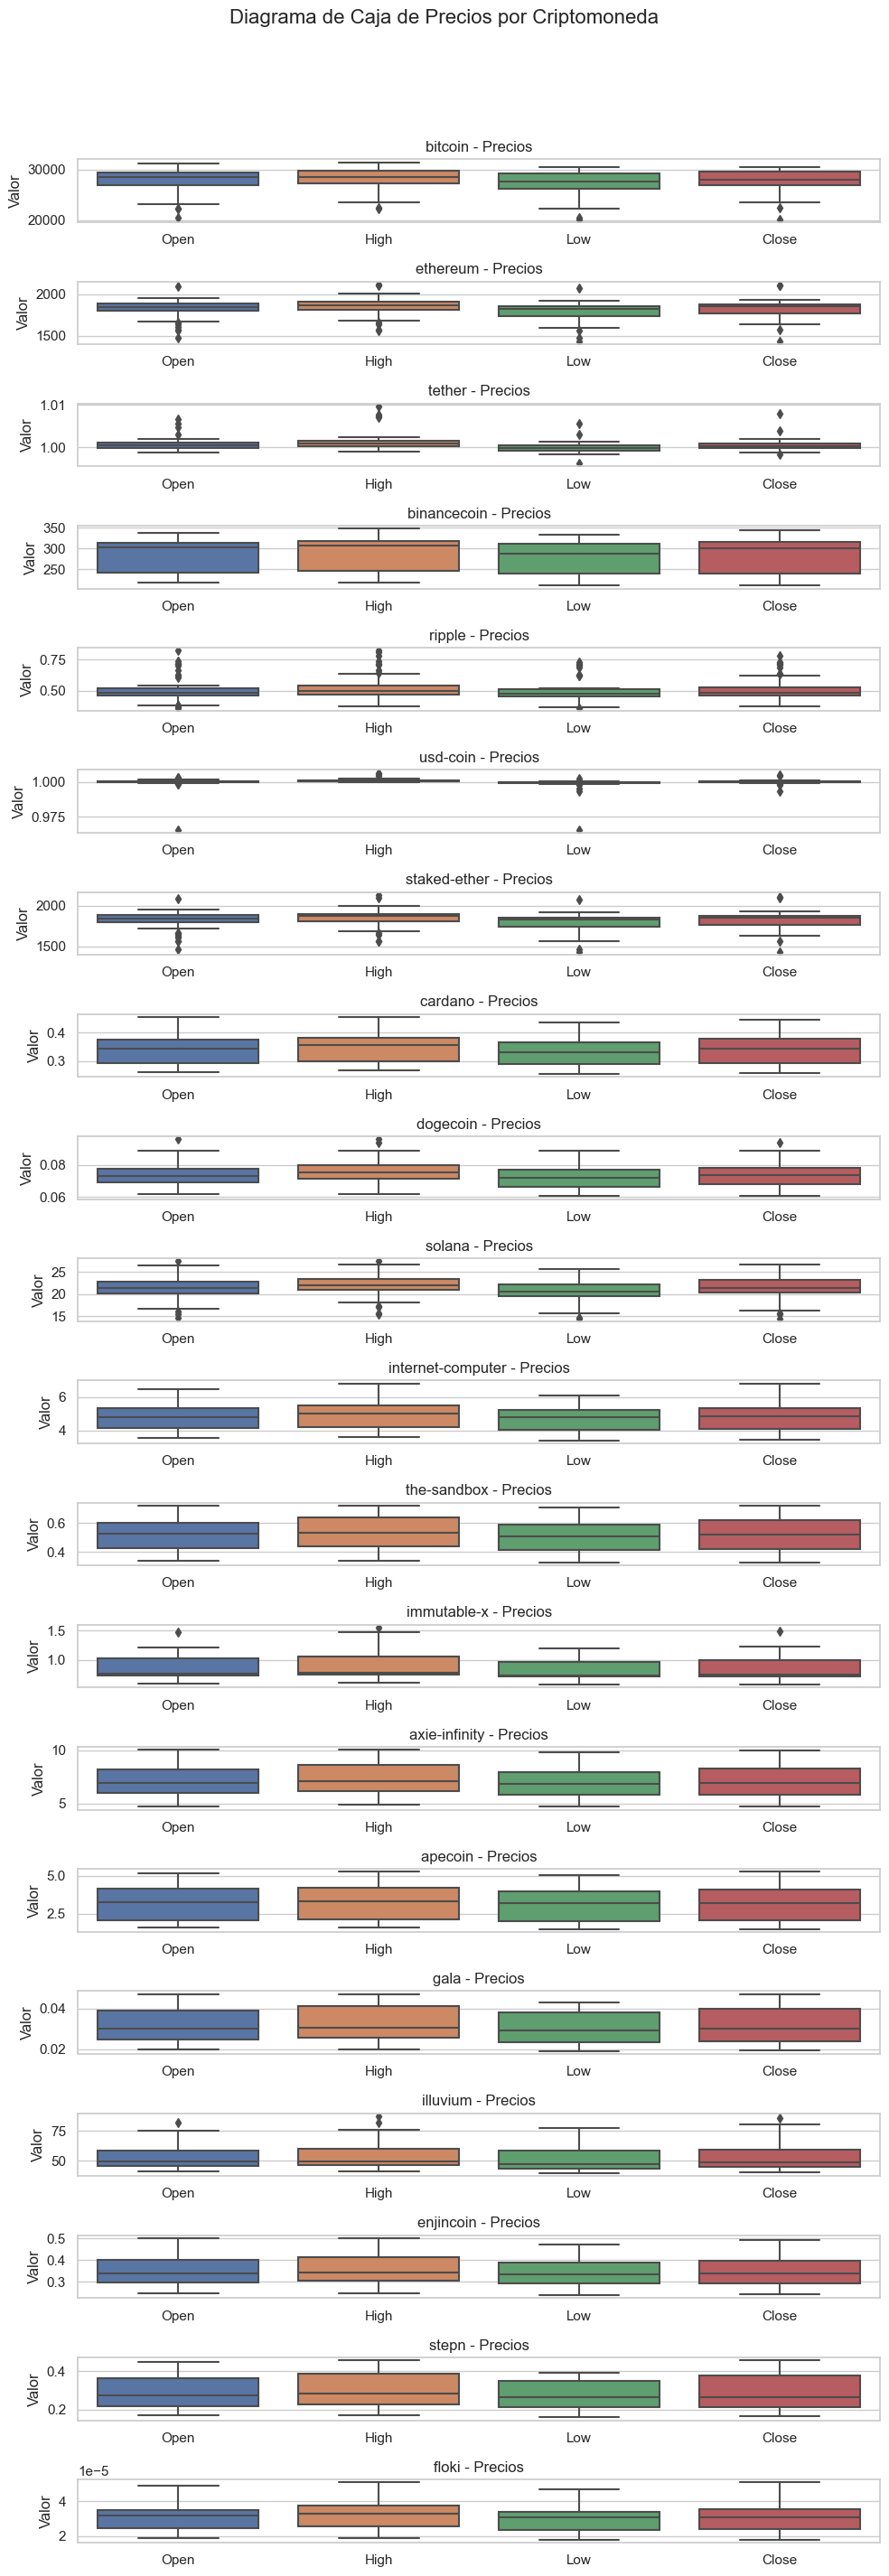

In [88]:
# Configurar el estilo de Seaborn
sns.set(style='whitegrid')

# Crear subplots para cada criptomoneda
fig, axes = plt.subplots(nrows=len(combined_top_coins), figsize=(10, 30))
fig.suptitle('Diagrama de Caja de Precios por Criptomoneda', fontsize=16)

# Iterar a través de las criptomonedas y crear diagramas de caja
for i, crypto in enumerate(combined_top_coins):
    # Filtrar el DataFrame para la criptomoneda actual
    df_crypto = df_ohlc[df_ohlc['Criptomoneda'] == crypto]
    
    # Crear el diagrama de caja para las columnas 'Open', 'High', 'Low' y 'Close'
    sns.boxplot(data=df_crypto[['Open', 'High', 'Low', 'Close']], ax=axes[i])
    axes[i].set_title(f'{crypto} - Precios', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Valor')

# Ajustar el espaciado entre subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Mostrar los diagramas de caja
plt.show()

In [100]:
columnas_ohlc

['Open', 'High', 'Low', 'Close']

In [113]:
# Crear una lista vacía para almacenar las matrices de correlación
correlation_matrices = []

# Número de columnas por fila
columns_per_row = 4

# Calcular el número total de filas requeridas
total_rows = (len(combined_top_coins) + 3) // 4

# Crear una figura de matplotlib con subplots
fig, axes = plt.subplots(nrows=total_rows, ncols=columns_per_row, figsize=(15, 5 * total_rows))
fig.suptitle('Matrices de Correlación', fontsize=16)

# Aplanar la matriz de ejes para facilitar el acceso
axes = axes.flatten()

# Recorrer las criptomonedas en combined_top_coins
for i, cripto in enumerate(combined_top_coins):
    # Filtrar el DataFrame df_ohlc para la criptomoneda actual
    df_cripto = df_ohlc[df_ohlc['Criptomoneda'] == cripto]
    
    # Calcular la matriz de correlación para esta criptomoneda
    correlation_matrix = df_cripto[['Open', 'High', 'Low', 'Close']].corr()
    
    # Dibujar la matriz de correlación en el subplot correspondiente
    sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, cbar=False, ax=axes[i])
    
    # Establecer el título del subplot
    axes[i].set_title(cripto, fontsize=12)

# Eliminar los ejes vacíos si es necesario
if len(combined_top_coins) % 4 != 0:
    for j in range(len(combined_top_coins) % 4, 4):
        fig.delaxes(axes[-j])

# Ajustar el espaciado entre subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Mostrar el gráfico
plt.show()
